<a href="https://colab.research.google.com/github/casjunior93/Projeto-Tera-IA---Previsao-de-obitos-por-covid-considerando-doencas-pre-existentes/blob/main/Com_redes_reurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Habilitando o acesso ao Google Drive no Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Versão mais nova do matplotlib

In [ ]:
!pip install -U matplotlib --prefer-binary
import matplotlib
matplotlib.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'3.5.2'

# Bibliotecas fundamentais

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os 
import missingno as msno

#Não exibir avisos de atenção
import warnings
warnings.filterwarnings('ignore')

#Configura o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.5f}'.format

# Roteiro do Projeto

O livro [Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow](https://www.oreilly.com/library/view/maos-a-obra/9788550803814/) traz uma sugestão de roteiro para orientar um projeto de aprendizado de máquina. Os passos gerais são:

1.   Abordar o problema e analisar o panorama em geral
2.   Obter os dados
3.   Explorar os dados para obter informações úteis
4.   Preparar os dados para expor melhor os padrões de dados subjacentes aos algoritmos de aprendizado de máquina.
5.   Explorar modelos diferentes e selecionar os melhores.
6.   Aperfeiçoar os modelos e os combinar em uma solução ideal.
7.   Apresentar a solução.
8.   Implementar, monitorar e fazer a manutenção de seu sistema.



# 1 Abordar o problema e analisar o panorama em geral

A COVID-19 é uma doença causada pelo coronavírus SARS-CoV-2. Seus principais sintomas são febre, cansaço e tosse seca. [(1)](https://www.paho.org/pt/covid19) O crescimento rápido de casos e óbitos por COVID-19 causou uma grande sobrecarga do sistema de saúde no Brasil. [(2)](http://cadernos.ensp.fiocruz.br/csp/artigo/1451/mortalidade-por-covid-19-padronizada-por-idade-nas-capitais-das-diferentes-regioes-do-brasil) Várias cidades brasileiras sofreram com a falta de leitos de UTI para casos graves de COVID-19, o que trouxe um dado alarmante: em 2021, 38% das mortes por covid ocorreram por falta de atendimento médico. [(3)](https://oglobo.globo.com/brasil/em-2021-38-dos-mortos-por-covid-em-hospitais-nao-chegaram-uti-1-24944189)

O objetivo desse modelo é prever se uma pessoa pode vir a óbito por covid-19 levando em consideração as doenças pré-existentes desta. Este modelo poderia ser útil para fazer a triagem de pacientes e o gerenciamento de leitos. Além disso, pode ser uma boa ferramenta para a prevenção de casos graves de COVID-19, gerando recomendações de vacinação, por exemplo, tendo em vista as diversas variantes do vírus que estão aparecendo e ao relaxamento das medidas de isolamento.

# 2 Obter os dados

Os dados utilizados são referentes à população do estado de São Paulo e serão obtidos através da página [do site](https://www.seade.gov.br/coronavirus/) da Fundação SEADE - Sistema Estadual de Análise de Dados. Eles foram obtidos no dia 20 de julho de 2022 e apresentam dados recolhidos de 04 de fevereiro de 2020 até o dia 18 de julho de 2022.

Dicionário: https://github.com/seade-R/dados-covid-sp#dicion%C3%A1rio-para-o-arquivo-de-casos-%C3%B3bitos-e-doen%C3%A7as-pr%C3%A9-existentes

Dados: https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/casos_obitos_doencas_preexistentes.csv.zip

## 2.1 Dicionário

`codigo_ibge`	Código do município no IBGE (7 dígitos) de residência do paciente

`nome_munic`	Nome do município de residência do paciente

`idade`	Idade do paciente

`cs_sexo`	Sexo do paciente

`diagnostico_covid19`	Confirmação de COVID-19

`data_inicio_sintomas`	Data de início dos sintomas

`obito`	Indica se o paciente veio a óbito por COVID-19

`asma`	Paciente apresenta esse fator de risco (asma)

`cardiopatia`	Paciente apresenta esse fator de risco (cardiopatia)

`diabetes`	Paciente apresenta esse fator de risco (diabetes)

`doenca_hematologica`	Paciente apresenta esse fator de risco (doença hematológica)

`doenca_hepatica`	Paciente apresenta esse fator de risco (doença hepática)

`doenca_neurologica`	Paciente apresenta esse fator de risco (doença neurológica)

`doenca_renal`	Paciente apresenta esse fator de risco (doença renal)

`imunodepressao`	Paciente apresenta esse fator de risco (imunodepressão)

`obesidade`	Paciente apresenta esse fator de risco (obesidade)

`outros_fatores_de_risco`	Paciente apresenta outros fatores de risco

`pneumopatia`	Paciente apresenta esse fator de risco (pneumopatia)

`puerpera`	Paciente se encontra nesse estágio (puérpera)

`sindrome_de_down`	Paciente apresenta esse fator de risco (síndrome de down)

## 2.2 Importação dos dados

In [ ]:
%%time
df_completo = pd.read_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/casos_obitos_doencas_preexistentes.csv',
                          sep=';', encoding='utf-8', parse_dates=['data_inicio_sintomas'])

CPU times: user 49.7 s, sys: 7.2 s, total: 56.9 s
Wall time: 1min 27s


In [ ]:
df_completo.head(2)

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
0,Santa Cruz do Rio Pardo,3546405,42.00000,MASCULINO,CONFIRMADO,2022-01-23 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,Santa Cruz do Rio Pardo,3546405,26.00000,FEMININO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,Santa Cruz do Rio Pardo,3546405,51.00000,MASCULINO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,IGNORADO,SIM,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
3,Santa Cruz do Rio Pardo,3546405,57.00000,MASCULINO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4,Santa Cruz do Rio Pardo,3546405,25.00000,MASCULINO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


In [ ]:
df_completo.shape

(5852960, 20)

Os registros com valores 'IGNORADO' correspondem a dados que não foram informados.

Dataframe sem os dados com os campos com valor 'IGNORADO':

In [ ]:
%%time
colunas = df_completo.columns
df_sem_ignorados = df_completo.copy()

for c in colunas:
  df_sem_ignorados.drop(df_sem_ignorados.loc[df_sem_ignorados[c]=='IGNORADO'].index, inplace=True)

df_sem_ignorados.shape


CPU times: user 22.3 s, sys: 1.54 s, total: 23.9 s
Wall time: 31.9 s


Salvando registros sem ignorados em csv:

In [ ]:
%%time
os.makedirs('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid', exist_ok=True)  
df_sem_ignorados.to_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/casos_obitos_doencas_preexistentes_sem_ignorados.csv') 

CPU times: user 3.91 s, sys: 57.4 ms, total: 3.97 s
Wall time: 5.69 s


In [ ]:
df_sem_ignorados.head()

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
7,Santa Cruz do Rio Pardo,3546405,68.00000,FEMININO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,NÃO,SIM,SIM,NÃO,NÃO,NÃO,SIM,NÃO,NÃO,SIM,NÃO,NÃO,NÃO
28,Santa Cruz do Rio Pardo,3546405,77.00000,FEMININO,CONFIRMADO,2022-01-18 00:00:00+00:00,1,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO
31,Santa Bárbara d'Oeste,3545803,22.00000,MASCULINO,CONFIRMADO,2020-10-22 00:00:00+00:00,0,NÃO,SIM,SIM,NÃO,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO
91,Santa Cruz do Rio Pardo,3546405,71.00000,MASCULINO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,SIM,NÃO,NÃO
93,Santa Cruz do Rio Pardo,3546405,102.00000,MASCULINO,CONFIRMADO,2022-01-24 00:00:00+00:00,1,NÃO,SIM,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO


In [ ]:
print(f'O conjunto de dados sem ignorados tem {df_sem_ignorados.shape[0]} registros.')

O conjunto de dados sem ignorados tem 185800 registros.


# 3 Explorar os dados para obter informações úteis

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/casos_obitos_doencas_preexistentes_sem_ignorados.csv', sep=',')
#df = pd.read_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/casos_obitos_doencas_preexistentes.csv', sep=',')
df = df_completo

## 3.1 Análise descritiva

Achamos interessante analisar primeiramente o período anterior ao início da vacinação no Estada de São Paulo, que começou em 17 de janeiro de 2021 com a vacinação da enfermeira Mônica Calazans. [(4)](https://vejasp.abril.com.br/saude/ato-simbolico-de-doria-marca-inicio-da-vacinacao-em-sao-paulo/)

Obtendo dados anteriores à 17 de janeiro de 2021.

In [ ]:
%%time
df = df.loc[df['data_inicio_sintomas'] < '2021-01-17']

CPU times: user 351 ms, sys: 2.06 ms, total: 353 ms
Wall time: 391 ms


In [ ]:
min_data = df.loc[df['data_inicio_sintomas'] < '2021-01-17']['data_inicio_sintomas'].min()
max_data = df.loc[df['data_inicio_sintomas'] < '2021-01-17']['data_inicio_sintomas'].max()

In [ ]:
print(f'Novo tamanho do dataframe: {df.shape[0]}')
print(f'Data mínima: {min_data}')
print(f'Data mínima: {max_data}')

Novo tamanho do dataframe: 1844188
Data mínima: 2020-02-04 00:00:00+00:00
Data mínima: 2021-01-16 00:00:00+00:00


In [ ]:
%%time
df.describe(include='all')

CPU times: user 3.91 s, sys: 19.5 ms, total: 3.93 s
Wall time: 3.93 s


,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
count,1844188,1844188.00000,1843023.00000,1844188,1844188,1844188,1844188.00000,1844188,1844188,1844188,1844188,1844188,1844188,1844188,1844188,1844188,1844188,1844188,1844188,1844188
unique,646,NaN,NaN,4,1,348,NaN,3,3,3,3,3,3,3,3,3,3,3,3,3
top,São Paulo,NaN,NaN,FEMININO,CONFIRMADO,2021-01-04 00:00:00+00:00,NaN,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
freq,498959,NaN,NaN,994117,1844188,17636,NaN,1756856,1635133,1679126,1758235,1758544,1755748,1752060,1747838,1756630,1741887,1756030,1759364,1758586
first,NaN,NaN,NaN,NaN,NaN,2020-02-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2021-01-16 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3535903.37141,41.62564,NaN,NaN,NaN,0.03221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,17025.65991,17.42508,NaN,NaN,NaN,0.17657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,3500105.00000,0.00000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3520400.00000,29.00000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Informações obtidas através do método describe():

* O conjunto tem 1844188 regitros.
* Houve mais casos de COVID-19 confirmados na cidade de São Paulo.
* As mulheres são a maioria dos casos.
* A média de óbitos dá uma indicação de que a maioria das pessoas da amostra não morreram.

Vou verificar a idade máxima de 136 anos. Com certeza é um erro.

In [ ]:
df.shape

(1844188, 20)

In [ ]:
df.loc[df['idade'] == 136]

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
3722824,Taubaté,3554102,136.00000,MASCULINO,CONFIRMADO,2020-03-19 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


Vou excluir esse dado.

In [ ]:
indexes = df[ df['idade'] == 136 ].index
df.drop(indexes , inplace=True)

In [ ]:
df.shape

(1844187, 20)

## 3.2 Tipo dos dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844187 entries, 13 to 5852907
Data columns (total 20 columns):
 #   Column                   Dtype              
---  ------                   -----              
 0   nome_munic               object             
 1   codigo_ibge              int64              
 2   idade                    float64            
 3   cs_sexo                  object             
 4   diagnostico_covid19      object             
 5   data_inicio_sintomas     datetime64[ns, UTC]
 6   obito                    int64              
 7   asma                     object             
 8   cardiopatia              object             
 9   diabetes                 object             
 10  doenca_hematologica      object             
 11  doenca_hepatica          object             
 12  doenca_neurologica       object             
 13  doenca_renal             object             
 14  imunodepressao           object             
 15  obesidade                object

## 3.3 Dados Nulos

CPU times: user 1.65 s, sys: 120 ms, total: 1.77 s
Wall time: 1.67 s


<AxesSubplot:>

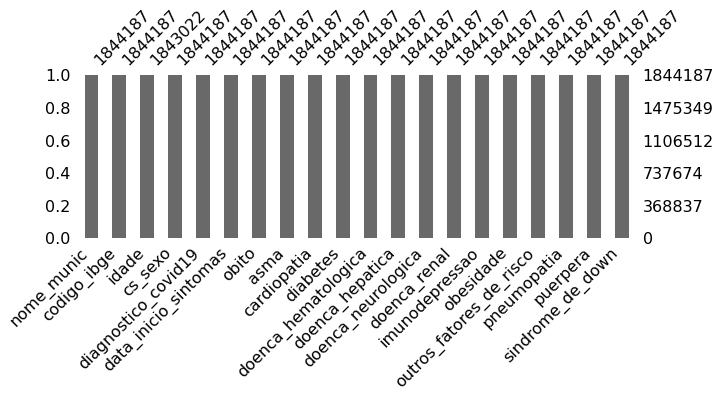

In [ ]:
%%time
msno.bar(df, figsize=(10, 3))

In [ ]:
df.isnull().sum()

nome_munic                    0
codigo_ibge                   0
idade                      1165
cs_sexo                       0
diagnostico_covid19           0
data_inicio_sintomas          0
obito                         0
asma                          0
cardiopatia                   0
diabetes                      0
doenca_hematologica           0
doenca_hepatica               0
doenca_neurologica            0
doenca_renal                  0
imunodepressao                0
obesidade                     0
outros_fatores_de_risco       0
pneumopatia                   0
puerpera                      0
sindrome_de_down              0
dtype: int64

Verificamos que há dados de idades faltantes. Verificando se podemos excluir esses dados:

In [ ]:
total_nulos = df['idade'].isnull().sum()
total_registros = df.shape[0]
porcentagem = (total_nulos/total_registros) * 100
print(f'{porcentagem}%')

0.06317146796935452%


Como os dados nulos representam apenas 0.063%, vou excluí-los.

In [ ]:
df.shape

(1844187, 20)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(1843022, 20)

## 3.4 Idade

### 3.4.1 Visualização da feature idade

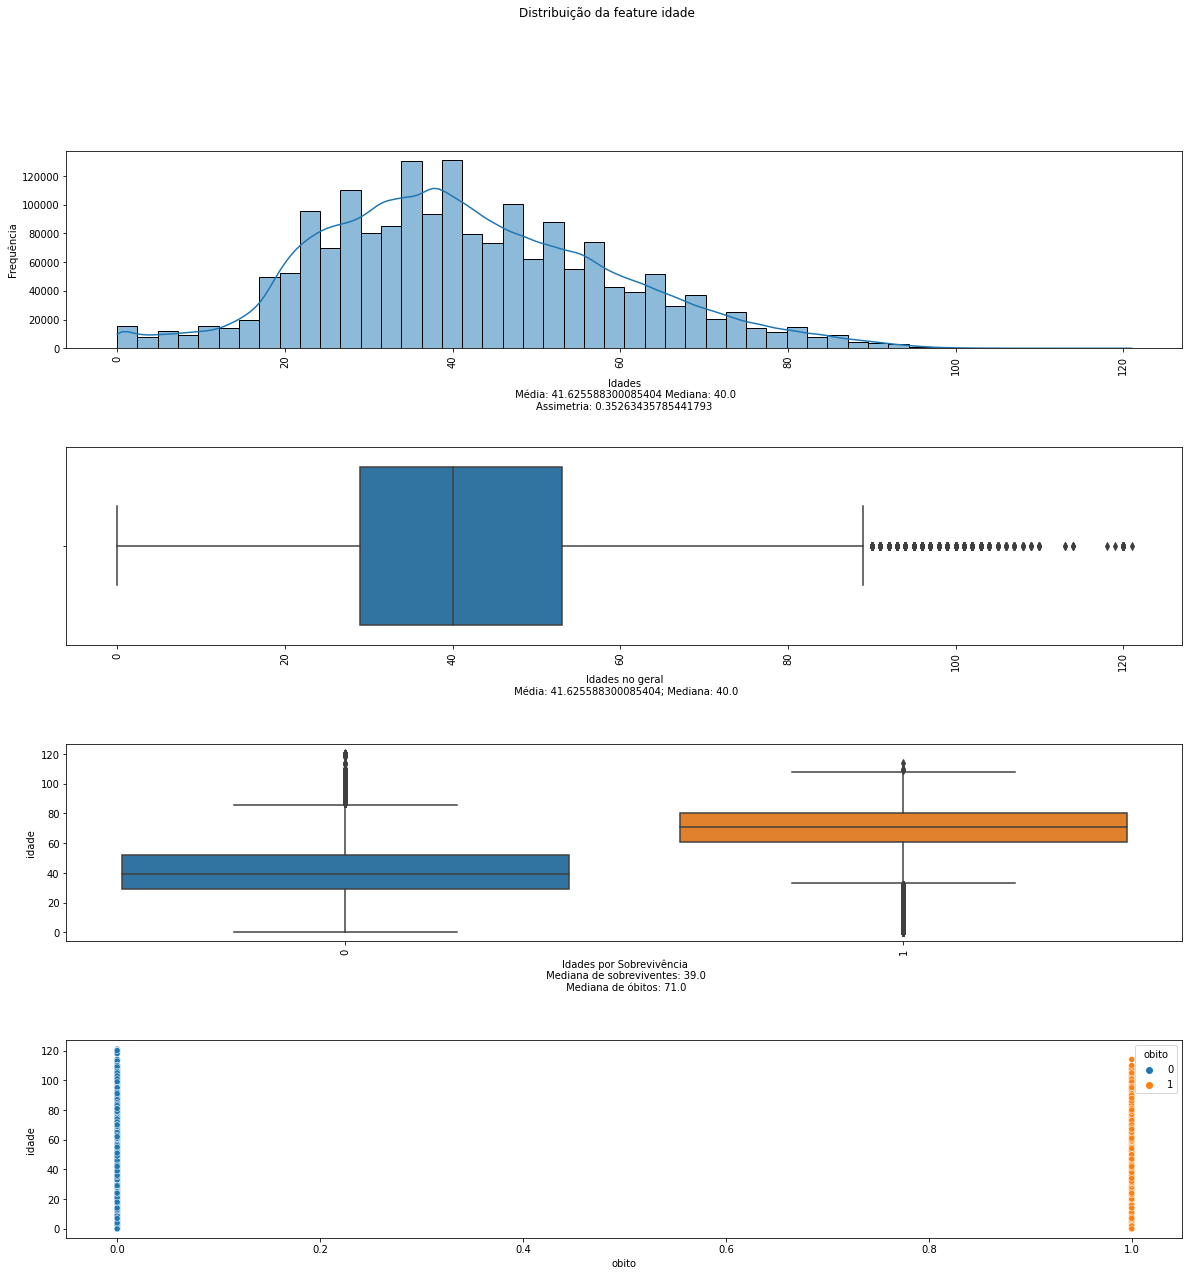

CPU times: user 59.2 s, sys: 4.56 s, total: 1min 3s
Wall time: 1min


In [ ]:
%%time

fig, axes = plt.subplots(4, 1, figsize = (20,20))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Distribuição da feature idade')

#Idade
sns.histplot(ax=axes[0],x=df['idade'], kde=True, bins=50)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Idades\n Média: ' + str(df['idade'].mean()) + ' Mediana: ' + str(df['idade'].median()) + '\nAssimetria: ' + str(df.idade.skew()), ylabel='Frequência')

#Idade - Boxplot
sns.boxplot(ax=axes[1],x=df['idade'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Idades no geral\n Média: ' + str(df['idade'].mean()) + '; Mediana: ' + str(df['idade'].median()))

#Idade - Boxplot
sns.boxplot(ax=axes[2],x=df['obito'], y=df['idade'])
axes[2].tick_params(axis='x', rotation=90)
axes[2].set(xlabel='Idades por Sobrevivência\n Mediana de sobreviventes: ' + str(df.loc[df['obito'] == 0]['idade'].median()) + '\n Mediana de óbitos: ' + str(df.loc[df['obito'] == 1]['idade'].median()))

#Idade vs Óbito
sns.scatterplot(ax=axes[3], data=df, x="obito", y="idade", hue="obito")

plt.show();

* Há outliers acima de 90 anos muito estranhos.

Como há outliers acima de 90 anos, vou verificar se posso considerar somente dados abaixo ou igual à 90 anos.

In [ ]:
total_casos_maior_90 = df[ df['idade'] > 90].shape[0]
total_registros = df.shape[0]
porcentagem = (total_casos_maior_90/total_registros) * 100
print(f'{porcentagem}%')

0.38143874571220526%


Como representam apenas 0.38% dos dados, vou excluir registros com mais de 90 anos.

In [ ]:
df.shape

(1843022, 20)

In [ ]:
indexes2 = df[ df['idade'] > 90].index
df.drop(indexes2 , inplace=True)

In [ ]:
df.shape

(1835992, 20)

Refazendo os gráficos:

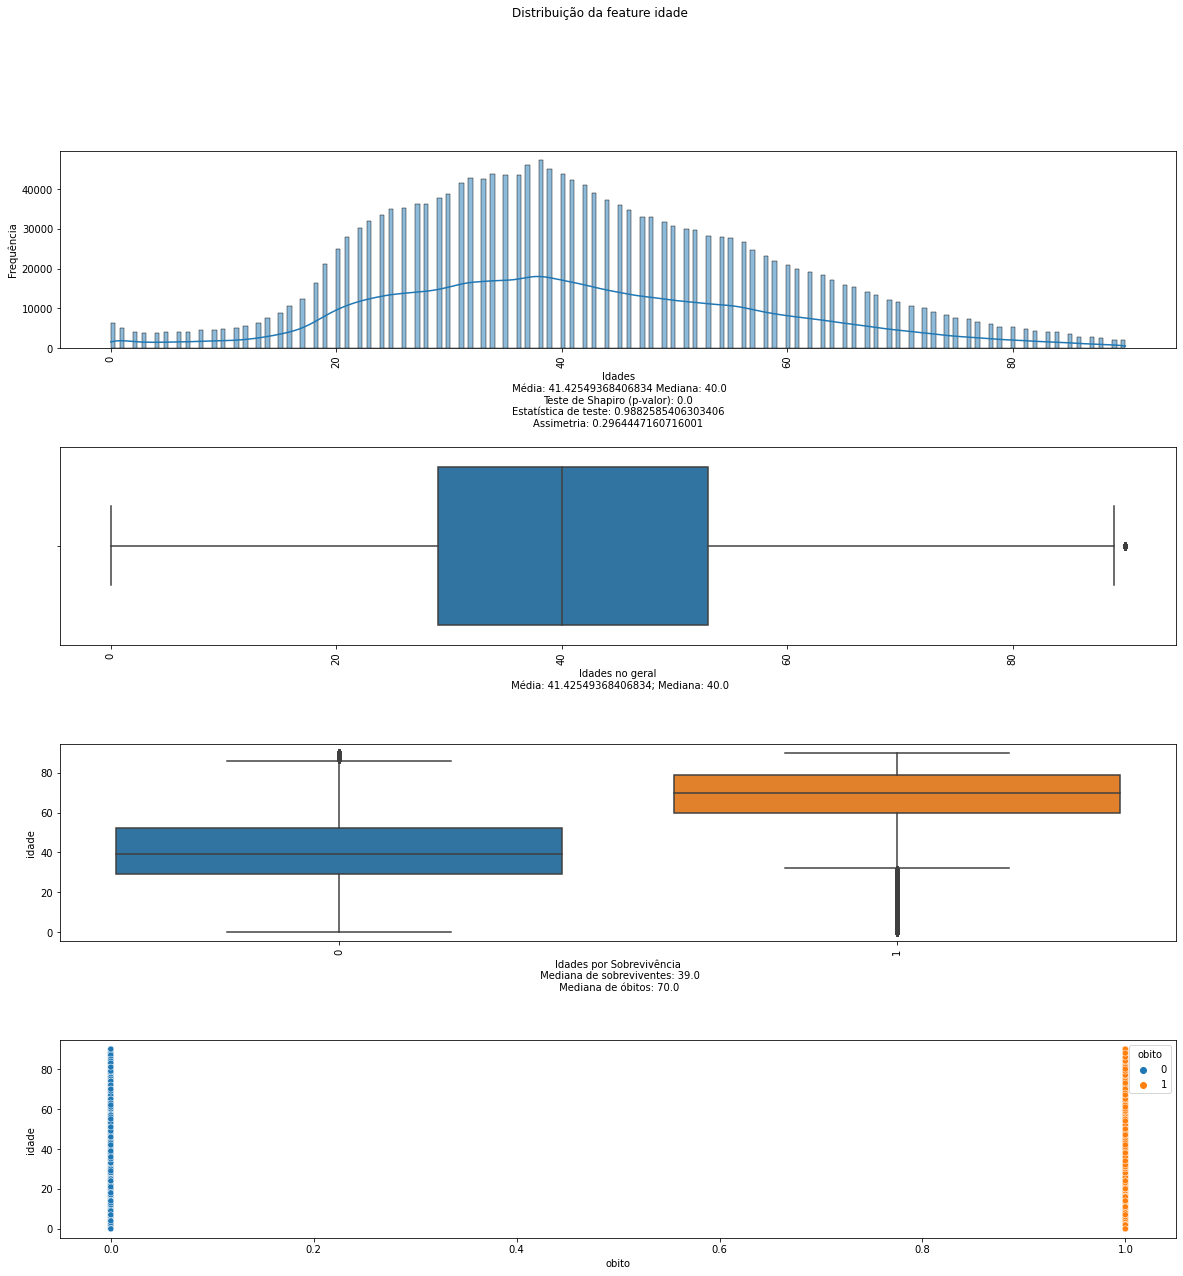

CPU times: user 58.7 s, sys: 5.31 s, total: 1min 4s
Wall time: 59.8 s


In [ ]:
%%time
stat1,p1 = stats.shapiro(df['idade'].to_numpy())

fig, axes = plt.subplots(4, 1, figsize = (20,20))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Distribuição da feature idade')

#Idade
sns.histplot(ax=axes[0],x=df['idade'], kde=True)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Idades\n Média: ' + str(df['idade'].mean()) + ' Mediana: ' + str(df['idade'].median()) + '\nTeste de Shapiro (p-valor): ' 
            + str(p1) + '\nEstatística de teste: ' + str(stat1) + '\nAssimetria: ' + str(df.idade.skew()), ylabel='Frequência')

#Idade - Boxplot
sns.boxplot(ax=axes[1],x=df['idade'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Idades no geral\n Média: ' + str(df['idade'].mean()) + '; Mediana: ' + str(df['idade'].median()))

#Idade - Boxplot
sns.boxplot(ax=axes[2],x=df['obito'], y=df['idade'])
axes[2].tick_params(axis='x', rotation=90)
axes[2].set(xlabel='Idades por Sobrevivência\n Mediana de sobreviventes: ' + str(df.loc[df['obito'] == 0]['idade'].median()) + '\n Mediana de óbitos: ' + str(df.loc[df['obito'] == 1]['idade'].median()))

#Idade vs Óbito
sns.scatterplot(ax=axes[3], data=df, x="obito", y="idade", hue="obito")

plt.show();

* A média das idades no geral é de aproximadamente 41 anos e a mediana é 40.
* O teste de Shapiro-Wilk indica que a distribuição não é normal, pois p-value < 0.5.
* A assimetria positiva indica que existe uma concentração levemente maior de valores na zona de idades mais baixas da amostra.
* Os boxplots indicam que o grupo de sobreviventes tem mediana de 39 anos, e o grupo de óbitos tem mediana de 70 anos, o que indica mortalidade maior em pessoas com maior idade.
* A dispersão dos dados indicam que os dados tem pouca variabilidade, tanto no grupos de sobreviventes quanto no de óbitos.

### 3.4.2 Teste de hipótese sobre a relação de idade e óbito

Como visto anteriormente, a feature idade não tem distribuição normal.

In [ ]:
stat2,p2 = stats.shapiro(df['idade'].to_numpy())

In [ ]:
print(f'Estatística de teste: {stat2}')
print(f'P-value: {p2}')

Estatística de teste: 0.9882585406303406
P-value: 0.0


Por isso, vou tentar normalizar utilizando logarítmo.

In [ ]:
def aplica_log(df):
  '''Aplica logarítmo no dado'''
  if df['idade'] == 0:
    return 0
  if df['idade'] > 0:
    return np.log(df['idade'])

In [ ]:
%%time
df['log_idade'] = df.apply(aplica_log, axis=1)

CPU times: user 48.6 s, sys: 529 ms, total: 49.2 s
Wall time: 50.5 s


CPU times: user 307 ms, sys: 14.7 ms, total: 321 ms
Wall time: 305 ms


<AxesSubplot:ylabel='Frequency'>

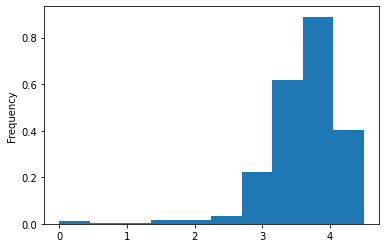

In [ ]:
%%time
df['log_idade'].plot.hist(density=True)

Testando a normalidade novamente:

In [ ]:
stat3, p3 = stats.shapiro(df['log_idade'])
print('O valor da estatística de Shapiro-Wilk = ' + str(stat3))
print('O valor de p de Shapiro-Wilk = ' + str(p3))

O valor da estatística de Shapiro-Wilk = 0.821019172668457
O valor de p de Shapiro-Wilk = 0.0


Continua não sendo normal. Vamos testar a raiz quadrada:

In [ ]:
def aplica_rq(df):
  '''Aplica raiz quadrada no dado'''
  return np.sqrt(df['idade'])

In [ ]:
%%time
df['sqrt_idade'] = df.apply(aplica_rq, axis=1)

CPU times: user 28.2 s, sys: 435 ms, total: 28.6 s
Wall time: 28.7 s


CPU times: user 284 ms, sys: 11 ms, total: 295 ms
Wall time: 284 ms


<AxesSubplot:ylabel='Frequency'>

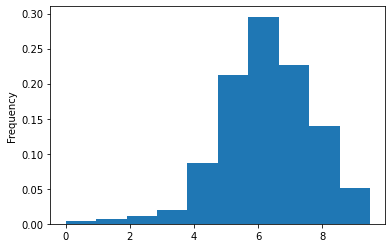

In [ ]:
%%time
df['sqrt_idade'].plot.hist(density=True)

Testando a normalidade:

In [ ]:
stat4, p4 = stats.shapiro(df['sqrt_idade'])
print('O valor da estatística de Shapiro-Wilk = ' + str(stat4))
print('O valor de p de Shapiro-Wilk = ' + str(p4))

O valor da estatística de Shapiro-Wilk = 0.9791151881217957
O valor de p de Shapiro-Wilk = 0.0


Ainda não, testando com raiz cúbica:

In [ ]:
def aplica_rc(df):
  '''Aplica raiz quadrada no dado'''
  return np.cbrt(df['idade'])

In [ ]:
%%time
df['cbrt_idade'] = df.apply(aplica_rc, axis=1)

CPU times: user 29.4 s, sys: 446 ms, total: 29.8 s
Wall time: 29.9 s


CPU times: user 295 ms, sys: 11.9 ms, total: 307 ms
Wall time: 298 ms


<AxesSubplot:ylabel='Frequency'>

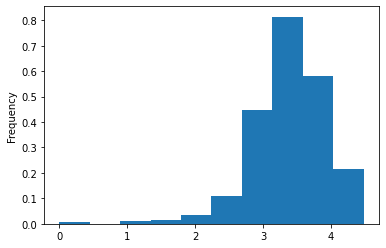

In [ ]:
%%time
df['cbrt_idade'].plot.hist(density=True)

Testando a normalidade:

In [ ]:
stat5, p5 = stats.shapiro(df['cbrt_idade'])
print('O valor da estatística de Shapiro-Wilk = ' + str(stat5))
print('O valor de p de Shapiro-Wilk = ' + str(p5))

O valor da estatística de Shapiro-Wilk = 0.9305524826049805
O valor de p de Shapiro-Wilk = 0.0


Não conseguimos obter uma curva próxima da normal. Uma indicação, como vimos [aqui](https://support.minitab.com/pt-br/minitab/19/help-and-how-to/statistics/basic-statistics/supporting-topics/normality/what-to-do-with-nonnormal-data/), é aplicar o Teste U de Mann-Whitney. Este [artigo](https://www.marsja.se/how-to-perform-mann-whitney-u-test-in-python-with-scipy-and-pingouin/) explica como executar este teste.

Dividindo o conjunto em dois grupos, um de sobreviventes e outro de óbitos.

In [ ]:
df.head(1)

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,...,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down,log_idade,sqrt_idade,cbrt_idade
13,Santa Bárbara d'Oeste,3545803,56.00000,FEMININO,CONFIRMADO,2020-10-20 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,...,IGNORADO,SIM,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,4.02535,7.48331,3.82586


In [ ]:
%%time
sobreviventes = df.loc[df['obito'] == 0]
obitos = df.loc[df['obito'] == 1]

CPU times: user 425 ms, sys: 588 µs, total: 426 ms
Wall time: 429 ms


In [ ]:
print(f'Quantidade de sobreviventes: {sobreviventes.shape[0]}')
print(f'Quantidade de obitos: {obitos.shape[0]}')

Quantidade de sobreviventes: 1779707
Quantidade de obitos: 56285


Obtendo as médias de idades.

In [ ]:
%%time
media_sobreviventes = sobreviventes['idade'].mean()
media_obitos = obitos['idade'].mean()
print(f'Média de idades de sobreviventes: {media_sobreviventes}')
print(f'Média de idades de obitos: {media_obitos}')

Média de idades de sobreviventes: 40.587749556528124
Média de idades de obitos: 67.91459536288532
CPU times: user 8.97 ms, sys: 0 ns, total: 8.97 ms
Wall time: 10.6 ms


Definindo as hipóteses:

Vamos fazer um teste unicaudal para um alfa = 0,05 para testar se podemos afirmar de forma estatisticamente significativa que os óbitos ocorrem mais frequentemente com pessoas com maior idade.

* H0 - Não há diferença relevante entre as idades de óbitos e sobreviventes
* H1 - A idade de óbitos é maior

Testando se a diferença entre as idades dos grupos é estatisticamente relevante com o Teste U.

In [ ]:
%%time
#teste = mwu(obitos['idade'], sobreviventes['idade'], alternative='greater') - estoura a memória disponível no Colab Free
teste = stats.mannwhitneyu(obitos['idade'], sobreviventes['idade'], alternative="greater")

CPU times: user 1.55 s, sys: 10 ms, total: 1.56 s
Wall time: 1.57 s


In [ ]:
print('O valor da estatística do Teste U: ' + str(teste[0]))
print('O valor de p do Teste U: ' + str(teste[1]))

O valor da estatística do Teste U: 89044109889.0
O valor de p do Teste U: 0.0


Com o p-valor < 0.05, temos argumento estatístico para afirmar que óbitos ocorrem mais frequentemente em idades mais altas. Podemos dizer com 95% de confiança que pessoas com maior idade estão mais propensas a ter maiores complicações com a doença.

## 3.5 Problema gerado pela alta frequência de valores 'IGNORADO' nas variáveis

Durante a análise descritiva, percebemos que a frequência de 'IGNORADO' nas colunas de doenças é muito grande.

In [ ]:
df.columns

Index(['nome_munic', 'codigo_ibge', 'idade', 'cs_sexo', 'diagnostico_covid19',
       'data_inicio_sintomas', 'obito', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade',
       'outros_fatores_de_risco', 'pneumopatia', 'puerpera',
       'sindrome_de_down', 'log_idade', 'sqrt_idade', 'cbrt_idade'],
      dtype='object')

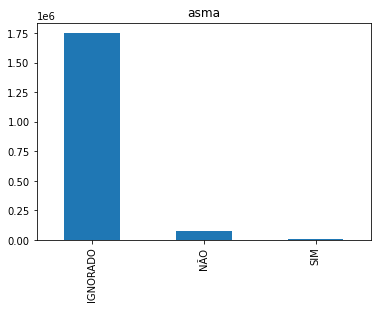

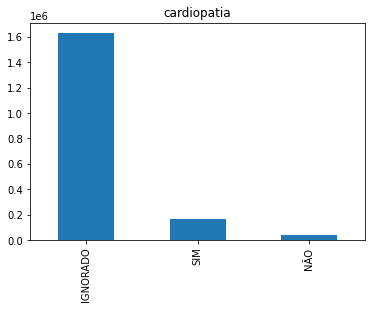

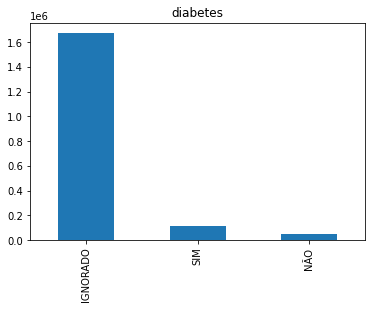

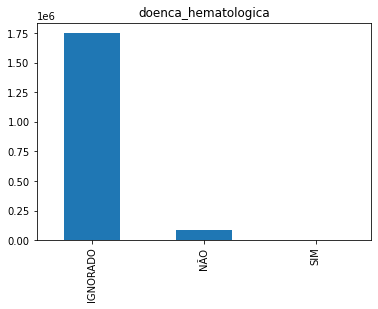

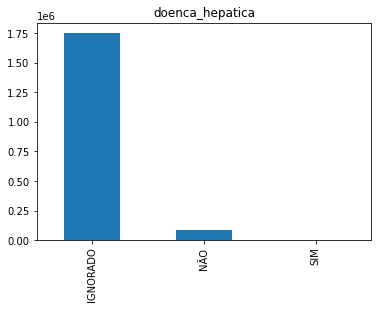

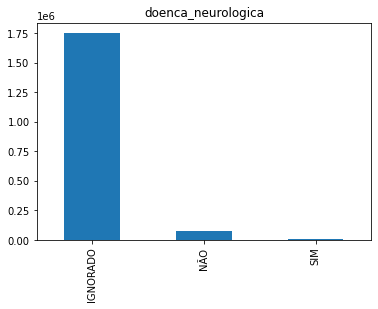

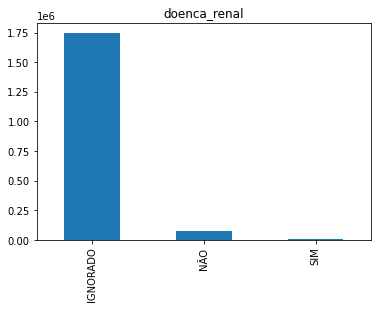

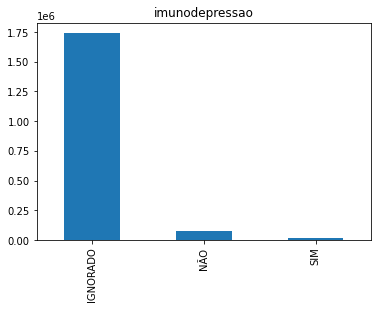

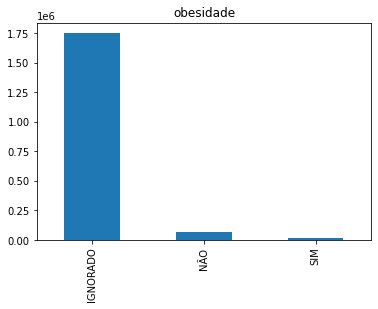

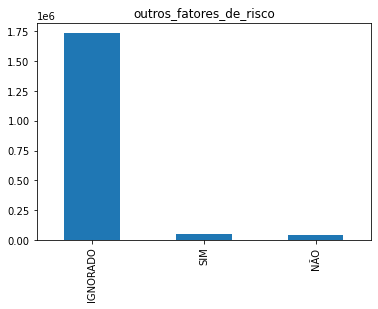

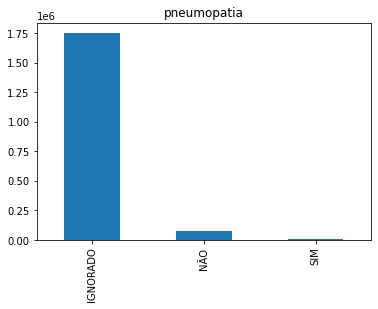

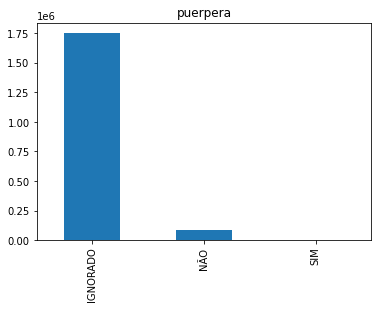

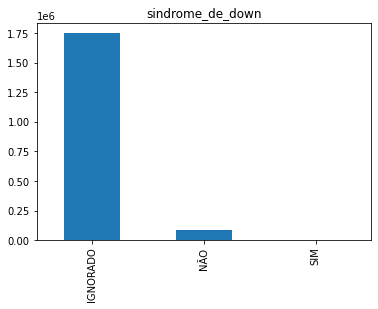

CPU times: user 3.91 s, sys: 1.41 s, total: 5.32 s
Wall time: 3.88 s


In [ ]:
%%time
colunas_doencas = ['asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade',
       'outros_fatores_de_risco', 'pneumopatia', 'puerpera',
       'sindrome_de_down']

for coluna in colunas_doencas:
  df[coluna].value_counts().plot.bar(title=coluna)
  plt.show();

### 3.5.1 Teste de hipótese para ver se a amostra sem IGNORADO difere do conjunto completo

Como uma ideia de solucionar, pensamos em utilizar o dataframe limpo de campos com IGNORADO que obtemos no início e focar na cidade com maior número de casos, que é São Paulo. Mas antes, para validar se foge muito da população, vamos testar se o dataframe sem ignorados tem diferença estatísticamente relevante entre as idades.

Já criamos um grupo sem ignorados antes.

In [ ]:
df_sem_ignorados.shape

(185800, 20)

Fazendo o Teste U.

H0 -> Não há diferença entre as idades dos grupos

H1 -> Há diferença entre as idades dos dois grupos

In [ ]:
teste2 = stats.mannwhitneyu(df_sem_ignorados['idade'], df['idade'], alternative="two-sided")

In [ ]:
print('O valor da estatística do Teste U: ' + str(teste2[0]))
print('O valor de p do Teste U: ' + str(teste2[1]))

O valor da estatística do Teste U: 274713862311.5
O valor de p do Teste U: 0.0


Como p-valor < 0.5, refuto H0. Há diferença significativa de idade entre os grupos com IGNORADO e sem valores com IGNORADO.

Visualizando:

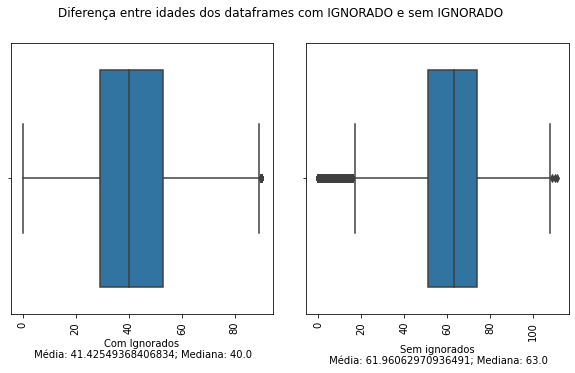

CPU times: user 397 ms, sys: 122 ms, total: 519 ms
Wall time: 396 ms


In [ ]:
%%time
fig, axes = plt.subplots(1, 2, figsize = (10,5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Diferença entre idades dos dataframes com IGNORADO e sem IGNORADO')

#Idade - Boxplot
sns.boxplot(ax=axes[0],x=df['idade'])
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Com Ignorados\n Média: ' + str(df['idade'].mean()) + '; Mediana: ' + str(df['idade'].median()))

#Idade - Boxplot
sns.boxplot(ax=axes[1],x=df_sem_ignorados['idade'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Sem ignorados\n Média: ' + str(df_sem_ignorados['idade'].mean()) + '; Mediana: ' + str(df_sem_ignorados['idade'].median()))

plt.show();

Temos que diferem muito nas distribuições das idades.

### 3.5.1 Teste de hipótese para ver se a amostra sem IGNORADO da cidade de São Paulo difere do conjunto completo

Hipóteses:

H0 -> Os dados não mostram diferenças de idade entre os grupos

H1 -> O grupos tem diferenças de idades

Obtendo os grupos.

In [ ]:
%%time
df_sp = df.loc[df.nome_munic == 'São Paulo']
df_sp_si = df_sem_ignorados.loc[df_sem_ignorados.nome_munic == 'São Paulo']

CPU times: user 245 ms, sys: 1.7 ms, total: 247 ms
Wall time: 244 ms


In [ ]:
df_sp_si.to_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/df_sp_sem_ignorados.csv')

Fazendo o teste

In [ ]:
teste3 = stats.mannwhitneyu(df_sp_si['idade'], df_sp['idade'], alternative="two-sided")

In [ ]:
print('O valor da estatística do Teste U: ' + str(teste3[0]))
print('O valor de p do Teste U: ' + str(teste3[1]))

O valor da estatística do Teste U: 14957916573.0
O valor de p do Teste U: 0.0


Com p-valor < 0.5, rejeita-se a hipótese nula. A distribuição das idades são diferentes.

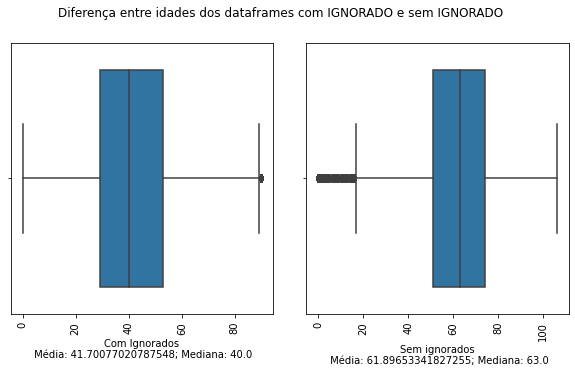

CPU times: user 299 ms, sys: 105 ms, total: 404 ms
Wall time: 286 ms


In [ ]:
%%time
fig, axes = plt.subplots(1, 2, figsize = (10,5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Diferença entre idades dos dataframes com IGNORADO e sem IGNORADO')

#Idade - Boxplot
sns.boxplot(ax=axes[0],x=df_sp['idade'])
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Com Ignorados\n Média: ' + str(df_sp['idade'].mean()) + '; Mediana: ' + str(df_sp['idade'].median()))

#Idade - Boxplot
sns.boxplot(ax=axes[1],x=df_sp_si['idade'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Sem ignorados\n Média: ' + str(df_sp_si['idade'].mean()) + '; Mediana: ' + str(df_sp_si['idade'].median()))

plt.show();

Será que a relação de idade e óbito que vimos antes muda em São Paulo com relação ao conjunto completo?

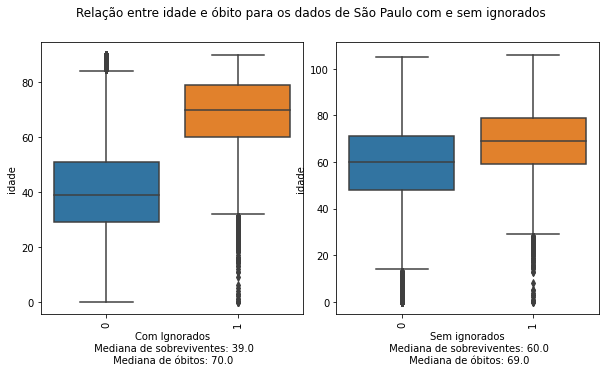

CPU times: user 551 ms, sys: 114 ms, total: 665 ms
Wall time: 542 ms


In [ ]:
%%time
fig, axes = plt.subplots(1, 2, figsize = (10,5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Relação entre idade e óbito para os dados de São Paulo com e sem ignorados')

#Idade - Boxplot
sns.boxplot(ax=axes[0],x=df_sp['obito'], y=df_sp['idade'])
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Com Ignorados\n Mediana de sobreviventes: ' + str(df_sp.loc[df_sp['obito'] == 0]['idade'].median()) + '\n Mediana de óbitos: ' + str(df_sp.loc[df_sp['obito'] == 1]['idade'].median()))

#Idade - Boxplot
sns.boxplot(ax=axes[1],x=df_sp_si['obito'], y=df_sp_si['idade'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Sem ignorados\n Mediana de sobreviventes: ' + str(df_sp_si.loc[df_sp_si['obito'] == 0]['idade'].median()) + '\n Mediana de óbitos: ' + str(df_sp_si.loc[df_sp_si['obito'] == 1]['idade'].median()))

plt.show();

Muda bastante a distribuição de sobreviventes, jogando a mediana para valores de idades mais altos. Muda pouco a distribuição de óbitos. Mas conserva a relação idade/óbito.

### 3.5.2 Teste para validar se o conjunto para a cidade de São Paulo sem IGNORADO conserva a relação de que pessoas com maior idade são mais propensas à complicações

Hipóteses:

H0 -> Os dados não mostram diferenças de idade entre os grupos

H1 -> O grupo de óbitos tem idades maiores

Obtendo os grupos.

In [ ]:
%%time
obitos_sp = df_sp_si.loc[df_sp_si.obito == 1]
sobreviventes_sp = df_sp_si.loc[df_sp_si.obito == 0]

CPU times: user 13.7 ms, sys: 0 ns, total: 13.7 ms
Wall time: 14.1 ms


In [ ]:
%%time
teste4 = stats.mannwhitneyu(obitos_sp['idade'], sobreviventes_sp['idade'], alternative="greater")

CPU times: user 28.7 ms, sys: 962 µs, total: 29.6 ms
Wall time: 28.7 ms


In [ ]:
print('O valor da estatística do Teste U: ' + str(teste4[0]))
print('O valor de p do Teste U: ' + str(teste4[1]))

O valor da estatística do Teste U: 207180157.5
O valor de p do Teste U: 0.0


Como p-valor < 0.5, rejeitamos HO e concluímos que a relação idade/óbito ainda se mantém. A partir de agora, vamos utilizar utilizar a amostra da cidade de São Paulo sem doenças com valores IGNORADOS.

In [ ]:
df_sp_si.shape

(37674, 20)

OBSERVAÇÕES:

* Ao resumir os dados retirando registros onde aparecem 'IGNORADO' nos campos de doenças, diminuímos o conjunto original de 5.852.960 registros para o Estado de São Paulo todo para 37.674 registros completos da cidade de São Paulo. Em produção, é possível que o comportamento das populações da capital e do estado sejam totalmente diferentes.
* Apesar da fonte oficial, é difícil dizer se os registros foram preenchidos corretamente e se são 100% confiáveis.

### 3.5.3 Análise descritiva dos dados da cidade de São Paulo

In [ ]:
df_sp_si.describe(include='all')

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
count,37674,37674.00000,37674.00000,37674,37674,37673,37674.00000,37674,37674,37674,37674,37674,37674,37674,37674,37674,37674,37674,37674,37674
unique,1,NaN,NaN,2,1,851,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2
top,São Paulo,NaN,NaN,MASCULINO,CONFIRMADO,2021-03-01 00:00:00+00:00,NaN,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO
freq,37674,NaN,NaN,19774,37674,206,NaN,35739,21640,23621,37085,37118,35217,35388,35789,32573,21643,35465,37532,37521
first,NaN,NaN,NaN,NaN,NaN,2020-03-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2022-07-16 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3550308.00000,61.89653,NaN,NaN,NaN,0.33015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.00000,17.07319,NaN,NaN,NaN,0.47027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,3550308.00000,0.00000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3550308.00000,51.00000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Há 37.674 casos confirmados n cidade de São Paulo
* Há mais casos confirmados entre Homens

<AxesSubplot:ylabel='Frequency'>

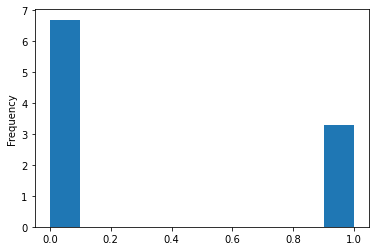

In [ ]:
df_sp_si['obito'].plot.hist(density=True)

## 3.6 Visualização das features de doenças

In [ ]:
df_sp_si.columns

Index(['nome_munic', 'codigo_ibge', 'idade', 'cs_sexo', 'diagnostico_covid19',
       'data_inicio_sintomas', 'obito', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade',
       'outros_fatores_de_risco', 'pneumopatia', 'puerpera',
       'sindrome_de_down'],
      dtype='object')

In [ ]:
df_doencas = df_sp_si[['asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade',
       'outros_fatores_de_risco', 'pneumopatia', 'puerpera',
       'sindrome_de_down']]
df_doencas.head(2)

,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
229500,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,SIM,NÃO,NÃO,NÃO
229511,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,SIM,NÃO,SIM,NÃO,NÃO


### 3.6.1 Visualizações

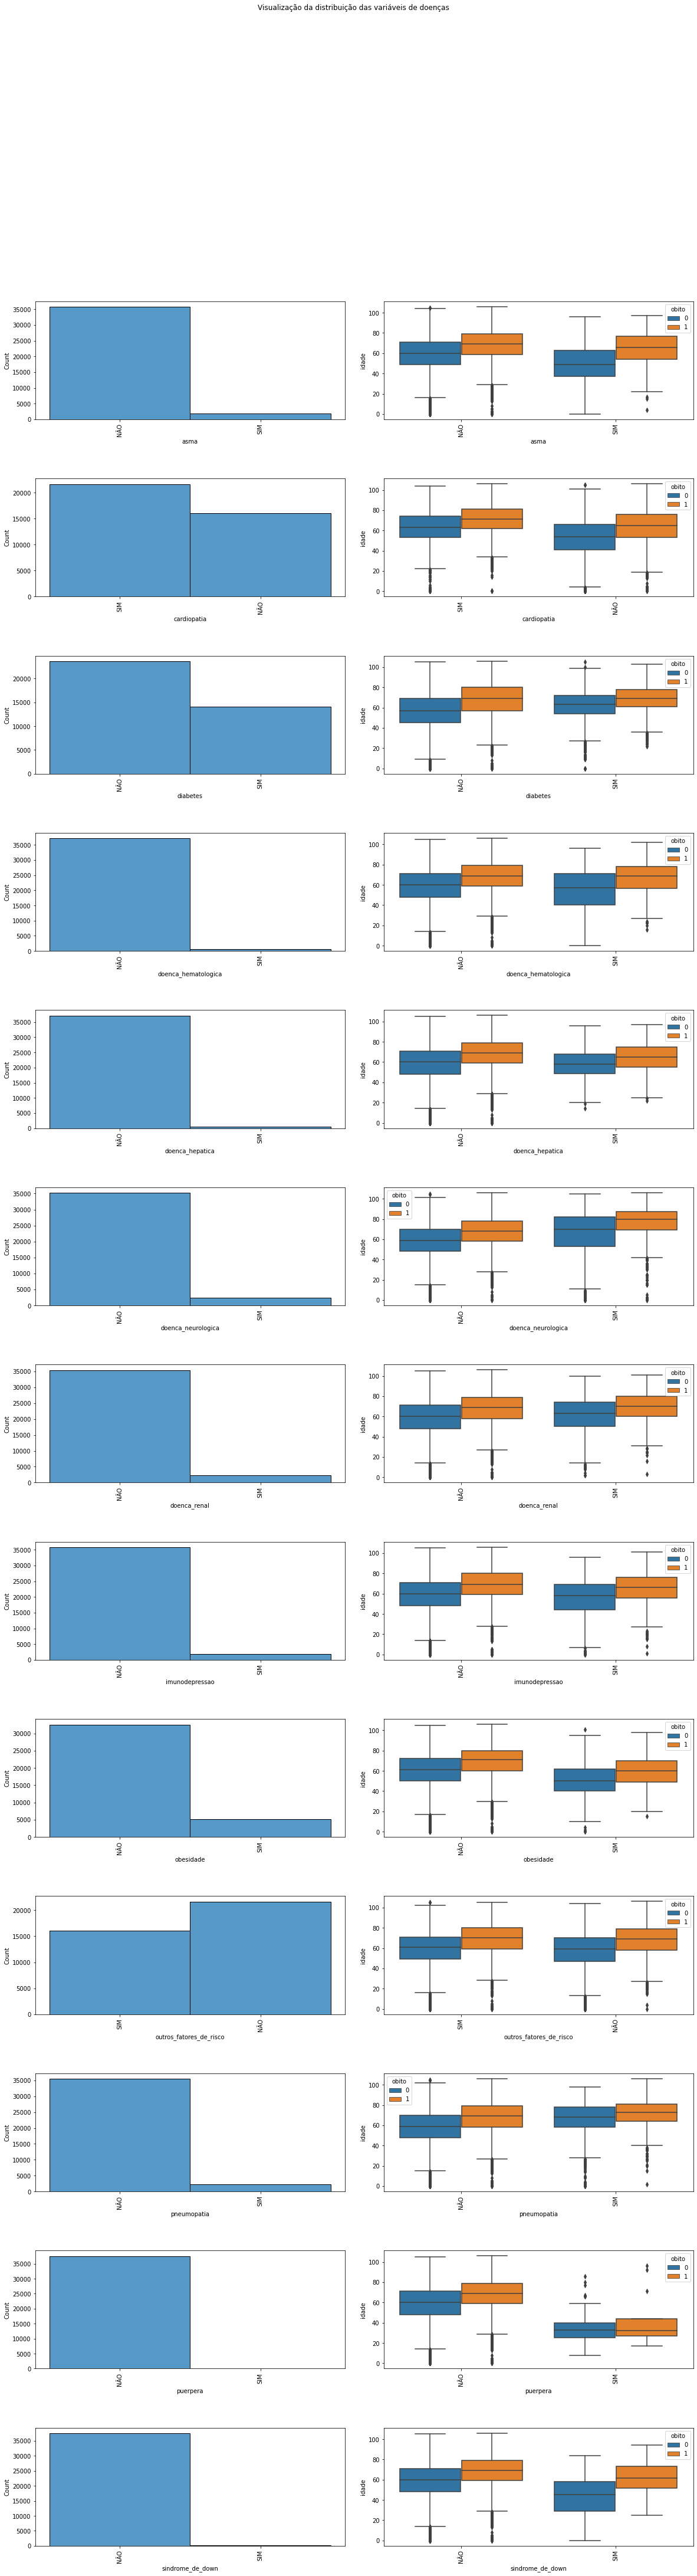

CPU times: user 4.42 s, sys: 146 ms, total: 4.57 s
Wall time: 4.47 s


In [ ]:
%%time
fig1, axes1 = plt.subplots(len(df_doencas.columns), 2, figsize = (20,70))
fig1.subplots_adjust(hspace=0.5, wspace=0.125)
fig1.suptitle('Visualização da distribuição das variáveis de doenças')


for i, doenca in enumerate(df_doencas.columns):
  #Frequencia
  sns.histplot(ax=axes1[i][0],x=df_sp_si[doenca])
  axes1[i][0].tick_params(axis='x', rotation=90)

  #Boxplot
  sns.boxplot(ax=axes1[i][1],x=df_sp_si[doenca], y=df_sp_si['idade'], hue=df_sp_si['obito'])
  axes1[i][1].tick_params(axis='x', rotation=90)

plt.show();

# 4 Preparar os dados para expor melhor os padrões de dados subjacentes aos algoritmos de aprendizado de máquina.

In [ ]:
df_sp_si.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37674 entries, 229500 to 4386909
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   nome_munic               37674 non-null  object             
 1   codigo_ibge              37674 non-null  int64              
 2   idade                    37674 non-null  float64            
 3   cs_sexo                  37674 non-null  object             
 4   diagnostico_covid19      37674 non-null  object             
 5   data_inicio_sintomas     37673 non-null  datetime64[ns, UTC]
 6   obito                    37674 non-null  int64              
 7   asma                     37674 non-null  object             
 8   cardiopatia              37674 non-null  object             
 9   diabetes                 37674 non-null  object             
 10  doenca_hematologica      37674 non-null  object             
 11  doenca_hepatica      

## 4.1 Excluindo algumas colunas

Como a intenção do projeto é prever óbitos de covid com base em doenças pré-existentes, vou retirar as colunas de gravidez e Síndrome de Down. Outro fator é que elas estão muito desbalanceadas. Também vou retirar a coluna de outros_fatores_de_risco, pois não dá para saber o que representa.

In [ ]:
del df_sp_si['outros_fatores_de_risco']
del df_sp_si['puerpera']
del df_sp_si['sindrome_de_down']

## 4.1 Transformando respostas 'SIM' ou 'NÃO' em 1 e 0, respectivamente.

In [ ]:
df_pronto = df_sp_si.replace('SIM', 1)
df_pronto = df_pronto.replace('NÃO', 0)

## 4.2 Convertendo 'MASCULINO' e 'FEMININO' em 0 e 1, respectivamente

In [ ]:
df_pronto = df_pronto.replace('MASCULINO', 0)
df_pronto = df_pronto.replace('FEMININO', 1)

## 4.3 Selecionando as features que vamos utilizar

In [ ]:
df_pronto.columns

Index(['nome_munic', 'codigo_ibge', 'idade', 'cs_sexo', 'diagnostico_covid19',
       'data_inicio_sintomas', 'obito', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade', 'pneumopatia'],
      dtype='object')

In [ ]:
df_ml = df_pronto[['idade', 'cs_sexo', 'obito', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade', 'pneumopatia']]

In [ ]:
df_ml.to_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/df_pronto.csv', index=False)

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37674 entries, 229500 to 4386909
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idade                37674 non-null  float64
 1   cs_sexo              37674 non-null  int64  
 2   obito                37674 non-null  int64  
 3   asma                 37674 non-null  int64  
 4   cardiopatia          37674 non-null  int64  
 5   diabetes             37674 non-null  int64  
 6   doenca_hematologica  37674 non-null  int64  
 7   doenca_hepatica      37674 non-null  int64  
 8   doenca_neurologica   37674 non-null  int64  
 9   doenca_renal         37674 non-null  int64  
 10  imunodepressao       37674 non-null  int64  
 11  obesidade            37674 non-null  int64  
 12  pneumopatia          37674 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 5.0 MB


## 4.4 Análise de correlação

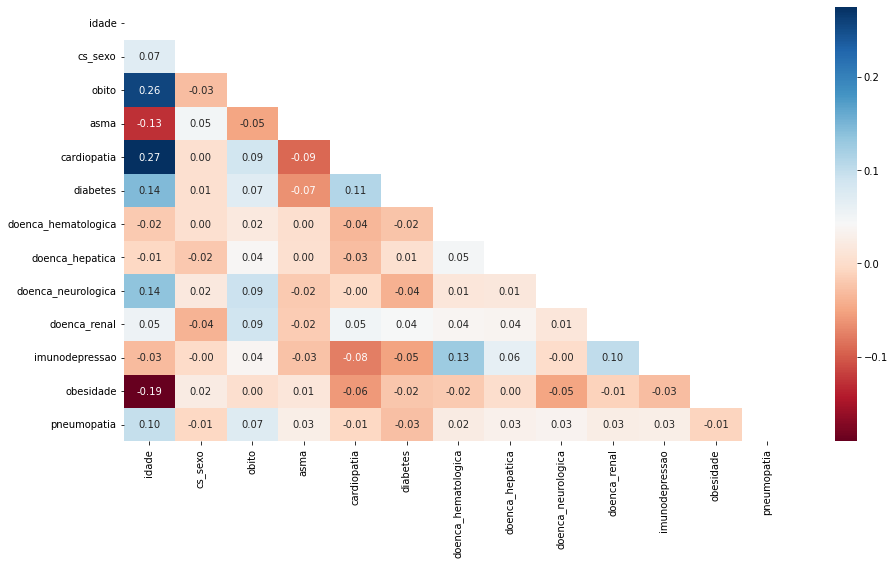

CPU times: user 700 ms, sys: 140 ms, total: 841 ms
Wall time: 721 ms


In [ ]:
%%time
sns.set_context(font_scale=1.9)
plt.figure(figsize=(15,8))
sns.heatmap(
    df_ml.corr(), annot=True, fmt='.2f', cmap='RdBu', mask=np.triu(np.ones_like(df_ml.corr())))
plt.show()

* A feature idade tem uma correlação positiva com a feature obito.
* A feature idade tem uma correlação positiva com cardiopatia.

## 4.5 Visualização da variável target

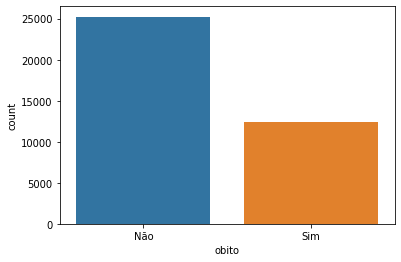

In [ ]:
g = sns.countplot(df_ml['obito'])
g.set_xticklabels(['Não', 'Sim'])
plt.show()

## 4.6 Normalização da feature idade e Feature Engineering

### 4.6.1 Normalização

In [ ]:
%%time

df_ml_bk = df_ml.copy()

from sklearn.preprocessing import MinMaxScaler

coluna = np.array(df_ml['idade']).reshape(-1,1)
df_ml['idade_norm'] = MinMaxScaler().fit_transform(coluna)

CPU times: user 62.9 ms, sys: 8.91 ms, total: 71.9 ms
Wall time: 172 ms


In [ ]:
df_ml.head()

,idade,cs_sexo,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,pneumopatia,idade_norm
229500,69.00000,1,0,0,1,0,0,0,0,0,0,0,0,0.65094
229511,69.00000,0,0,0,0,0,0,0,0,0,0,1,1,0.65094
229642,73.00000,1,0,0,0,1,0,0,0,0,0,0,0,0.68868
229681,61.00000,0,0,0,1,0,0,0,0,0,0,0,0,0.57547
229685,31.00000,0,0,0,0,0,0,0,0,0,0,1,0,0.29245


### 4.6.2 Criando uma feature de quantidade de doenças por registro

In [ ]:
df_ml.columns

Index(['idade', 'cs_sexo', 'obito', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade', 'pneumopatia',
       'idade_norm'],
      dtype='object')

In [ ]:
df_ml['quantidade_doencas'] = df_ml.iloc[:,3:13].sum(axis=1)

In [ ]:
df_ml.head(2)

,idade,cs_sexo,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,pneumopatia,idade_norm,quantidade_doencas
229500,69.00000,1,0,0,1,0,0,0,0,0,0,0,0,0.65094,1
229511,69.00000,0,0,0,0,0,0,0,0,0,0,1,1,0.65094,2


## 4.7 Tratando o desbalanceamento com oversampling

Tratar o desbalanceamento não trouxe melhores resultados.

### 4.7.1 IMportando o imbalanced-learn

In [ ]:
#df_ml_bk = df_ml.copy()

In [ ]:
#!pip install imbalanced-learn

In [ ]:
#from imblearn.over_sampling import SMOTE
#from collections import Counter

### 4.7.2 Aplicando o oversampling

In [ ]:
#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

In [ ]:
#contagem = Counter(y)
#print(contagem)

## 4.8 Separação do conjunto em conjuntos de treino e teste

### 4.8.1 Separando em datasets de features e target

In [ ]:
df_ml.columns

Index(['idade', 'cs_sexo', 'obito', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade', 'pneumopatia',
       'idade_norm', 'quantidade_doencas'],
      dtype='object')

In [ ]:
X = df_ml[['idade_norm', 'cs_sexo', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade', 'pneumopatia', 'quantidade_doencas']]

In [ ]:
''' X = df_ml[['idade_norm', 'cs_sexo', 'asma', 'cardiopatia', 'diabetes', 'doenca_neurologica',
       'doenca_renal', 'obesidade', 'pneumopatia', 'quantidade_doencas']] '''

" X = df_ml[['idade_norm', 'cs_sexo', 'asma', 'cardiopatia', 'diabetes', 'doenca_neurologica',\n       'doenca_renal', 'obesidade', 'pneumopatia', 'quantidade_doencas']] "

In [ ]:
y = df_ml['obito']

In [ ]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    shuffle=True)

# 5 Explorar modelos diferentes de classificação e selecionar os melhores.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

## 5.1 Logistic Regression

Importando função da [scikit-learn](https://scikit-learn.org/stable/):

In [ ]:
from sklearn.linear_model import LogisticRegression

### 5.1.1 Chamando a função

In [ ]:
logreg = LogisticRegression()
logreg

LogisticRegression()

### 5.1.2 Treinando o modelo

In [ ]:
%%time
logreg.fit(X_treino, y_treino)

CPU times: user 165 ms, sys: 98 ms, total: 263 ms
Wall time: 144 ms


LogisticRegression()

### 5.1.3 Predição

Visualização das probabilidades da Regressão Logística

In [ ]:
%%time
y_pred = logreg.predict(X_teste)

CPU times: user 8.61 ms, sys: 12.1 ms, total: 20.7 ms
Wall time: 15.5 ms


In [ ]:
%%time
y_pred_proba = logreg.predict_proba(X)
print(y_pred_proba)

[[0.70116925 0.29883075]
 [0.48031033 0.51968967]
 [0.65688683 0.34311317]
 ...
 [0.75652418 0.24347582]
 [0.73087113 0.26912887]
 [0.64097933 0.35902067]]
CPU times: user 12.5 ms, sys: 4.08 ms, total: 16.6 ms
Wall time: 13.8 ms


### 5.1.4 Métricas

#### 5.1.4.1 Acurácia

In [ ]:
%%time
print(f'Acurácia: {accuracy_score(y_teste, y_pred)}\n\Precisão: {precision_score(y_teste, y_pred)}\n\
      Revocação: {recall_score(y_teste, y_pred)} \nF1 Score: {f1_score(y_teste,  y_pred, pos_label = 0)}')

Acurácia: 0.6898576369339661
\Precisão: 0.5740378343118069
      Revocação: 0.21552779818760714 
F1 Score: 0.7996883116883118
CPU times: user 34.2 ms, sys: 35.9 ms, total: 70 ms
Wall time: 43.1 ms


#### 5.1.4.2 Matriz de Confusão

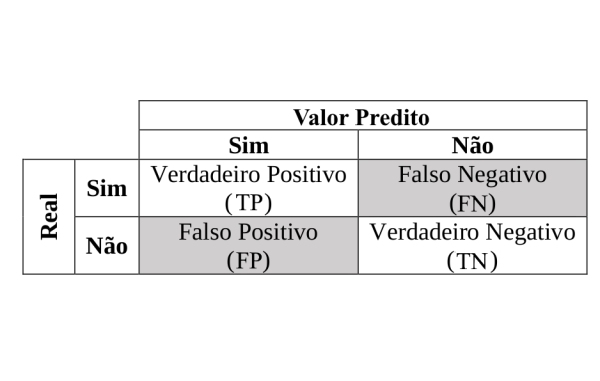

Matriz do modelo normal (logreg)

CPU times: user 59.5 ms, sys: 32.8 ms, total: 92.3 ms
Wall time: 72.1 ms


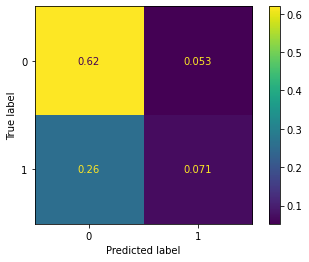

In [ ]:
%%time
cm_logreg2 = confusion_matrix(y_teste, y_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg2, display_labels=logreg.classes_)
disp.plot(values_format='.2g') 

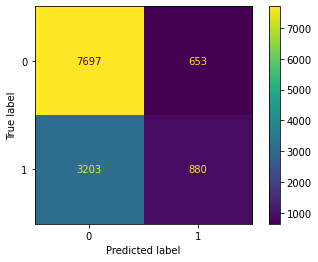

In [ ]:
cm_logreg2 = confusion_matrix(y_teste, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg2, display_labels=logreg.classes_)
disp.plot(values_format='d') 

O retorno de Falsos Negativos está muito alto. 

#### 5.1.4.3 Precisão e Recall

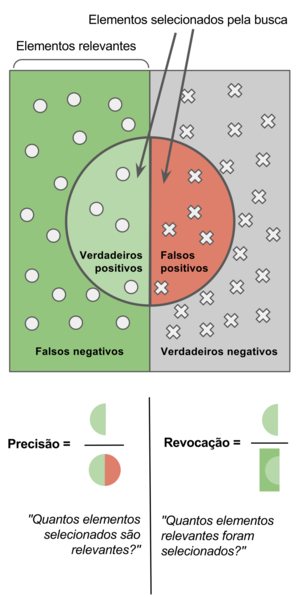

##### 5.1.4.3.1 Precisão

Sem validação cruzada

In [ ]:
%%time
precision_score(y_teste, y_pred, pos_label=0)

CPU times: user 7.59 ms, sys: 1.05 ms, total: 8.64 ms
Wall time: 8.24 ms


0.7061467889908257

##### 5.1.4.3.2 Revocação

Sem validação cruzada

In [ ]:
%%time
recall_score(y_teste, y_pred, pos_label=0)

CPU times: user 11.1 ms, sys: 73 µs, total: 11.2 ms
Wall time: 16.3 ms


0.9217964071856287

##### 5.1.2.3.3 Visualização Precisão x Revocação

Sem validação cruzada

CPU times: user 49.7 ms, sys: 38.5 ms, total: 88.2 ms
Wall time: 59.2 ms


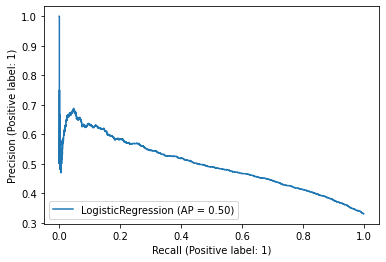

In [ ]:
%%time
disp = PrecisionRecallDisplay.from_estimator(logreg, X_teste, y_teste)

#### 5.1.4.4 F1 Score

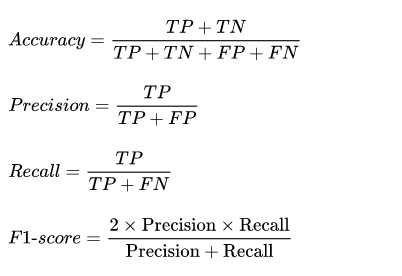

Sem validação

In [ ]:
f1_score(y_teste, y_pred, pos_label = 0)

0.7996883116883118

#### 5.1.4.5 Avaliação do modelo

Obs.: Para o modelo baseline

* As métricas da regressão logística com e sem validação cruzada diferem muito pouco
* A acurácia de 0.68 indica que o modelo acerta 68% das predições.
* A precisão de 0.70 indica que quando o modelo afirma que um caso virá a óbito, ele acerta 70% das vezes. A revocação de 0.92 indica que o modelo detecta 92% dos óbitos.
* Este modelo não seria um bom classificador para este estudo. Vamos tentar melhorá-lo trabalhando com *Trade-off precisão/revocação* para buscar aumentar a revocação. A precisão pode diminuir bastante, mas um número maior de óbitos poderão ser detectados.

## 5.2 Decision Tree

### 5.2.1 Chamando a função

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
ardec = DecisionTreeClassifier(max_depth=2)

### 5.2.2 Treinando o modelo

In [ ]:
%%time
ardec.fit(X_treino, y_treino)

CPU times: user 17.6 ms, sys: 2.13 ms, total: 19.7 ms
Wall time: 23.9 ms


DecisionTreeClassifier(max_depth=2)

### 5.2.3 Predição

In [ ]:
%%time
y_pred2 = ardec.predict(X_teste)

CPU times: user 9.51 ms, sys: 28 µs, total: 9.54 ms
Wall time: 9 ms


### 5.2.4 Métricas

#### 5.2.4.1 Acurácia

In [ ]:
print(f'Acurácia: {accuracy_score(y_teste, y_pred2)}')

Acurácia: 0.6781146947639347


#### 5.4.2.2 Matriz de confusão

CPU times: user 50.6 ms, sys: 1.87 ms, total: 52.5 ms
Wall time: 53.1 ms


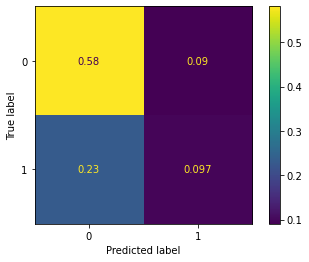

In [ ]:
%%time
cm_ardec = confusion_matrix(y_teste, y_pred2, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ardec, display_labels=ardec.classes_)
disp.plot(values_format='.2g') 

CPU times: user 44.9 ms, sys: 963 µs, total: 45.8 ms
Wall time: 47.1 ms


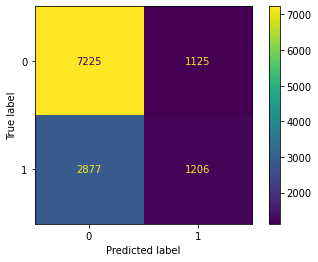

In [ ]:
%%time
cm_ardec = confusion_matrix(y_teste, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ardec, display_labels=ardec.classes_)
disp.plot(values_format='d')

#### 5.4.2.3 Precisão e revocação

##### 5.4.2.3.1 Precisão

In [ ]:
%%time
print(f'Precisão: {precision_score(y_teste, y_pred2, pos_label=0)}')

Precisão: 0.7152049099188279
CPU times: user 8.38 ms, sys: 885 µs, total: 9.27 ms
Wall time: 9.71 ms


##### 5.4.2.3.2 Revocação

In [ ]:
%%time
print(f'Revocação: {recall_score(y_teste, y_pred2, pos_label=0)}')

Revocação: 0.8652694610778443
CPU times: user 9.52 ms, sys: 798 µs, total: 10.3 ms
Wall time: 13.2 ms


##### 5.4.2.3.3 Visualização Precisão x Revocação

CPU times: user 28.7 ms, sys: 963 µs, total: 29.7 ms
Wall time: 29.9 ms


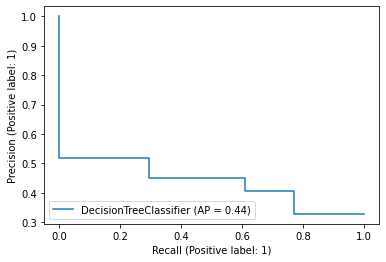

In [ ]:
%%time
disp = PrecisionRecallDisplay.from_estimator(ardec, X_teste, y_teste)

#### 5.2.4.4 F1 Score

In [ ]:
print(f'F1 Score: {f1_score(y_teste, y_pred2, pos_label = 0)}')

F1 Score: 0.783112941686538


#### 5.2.4.5 Avaliação

* A acurácia de 0.68 indica que o modelo acerta 68% das predições.
* A precisão de 0.71 indica que quando o modelo afirma que um caso virá a óbito, ele acerta 70% das vezes. A revocação de 0.86 indica que o modelo detecta 86% dos óbitos.
* Este modelo não seria um bom classificador para este estudo.
* Vamos tentar melhorá-lo trabalhando com Trade-off precisão/revocação para buscar aumentar a revocação. A precisão pode diminuir bastante, mas um número maior de óbitos poderão ser detectados.



## 5.3 SVM

### 5.3.1 Chamando a função

In [ ]:
from sklearn.svm import SVC

### 5.3.2 Treinando o modelo

In [ ]:
%%time
svm = SVC()
svm.fit(X_treino, y_treino)

CPU times: user 35.3 s, sys: 76 ms, total: 35.4 s
Wall time: 35.2 s


### 5.3.3 Predição

In [ ]:
%%time
y_pred_svm = svm.predict(X_teste)

CPU times: user 14.5 s, sys: 9.15 ms, total: 14.5 s
Wall time: 14.5 s


In [ ]:
y_pred_svm

array([0, 0, 0, ..., 1, 0, 0])

### 5.3.4 Métricas

#### 5.3.4.1 Acurácia

In [ ]:
print(f'Acurácia: {accuracy_score(y_teste, y_pred_svm)}')

Acurácia: 0.6789994369822248


#### 5.3.4.2 Matriz de confusão

CPU times: user 49.3 ms, sys: 996 µs, total: 50.3 ms
Wall time: 50 ms


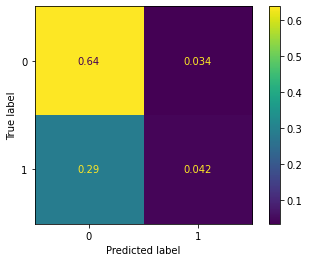

In [ ]:
%%time
cm_svm = confusion_matrix(y_teste, y_pred_svm, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp.plot(values_format='.2g') 

CPU times: user 50.7 ms, sys: 0 ns, total: 50.7 ms
Wall time: 51.1 ms


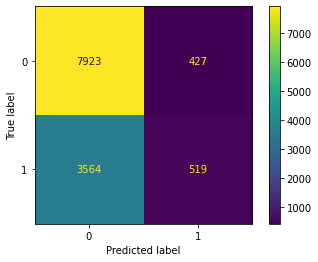

In [ ]:
%%time
cm_svm = confusion_matrix(y_teste, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp.plot(values_format='d') 

#### 5.3.4.3 Precisão

In [ ]:
%%time
print(f'Precisão: {precision_score(y_teste, y_pred_svm, pos_label=0)}')

Precisão: 0.6897362235570645
CPU times: user 9.75 ms, sys: 0 ns, total: 9.75 ms
Wall time: 9.89 ms


#### 5.3.4.4 Revocação

In [ ]:
%%time
print(f'Revocação: {recall_score(y_teste, y_pred_svm, pos_label=0)}')

Revocação: 0.9488622754491018
CPU times: user 11.7 ms, sys: 0 ns, total: 11.7 ms
Wall time: 12 ms


#### 5.3.4.5 Precisão x Revocação

CPU times: user 14.7 s, sys: 10.4 ms, total: 14.7 s
Wall time: 14.7 s


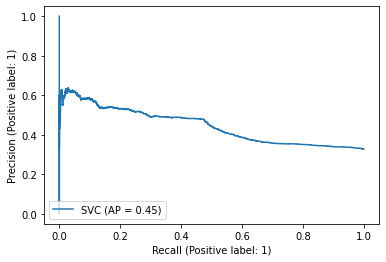

In [ ]:
%%time
disp = PrecisionRecallDisplay.from_estimator(svm, X_teste, y_teste)

#### 5.3.4.6 F1 Score

In [ ]:
print(f'F1 Score: {f1_score(y_teste,  y_pred_svm, pos_label = 0)}')

F1 Score: 0.798810303977416


#### 5.3.4.7 Avaliação

* A acurácia de 0.67 indica que o modelo acerta 67% das predições.
* A precisão de 0.67 indica que quando o modelo afirma que um caso virá a óbito, ele acerta 67% das vezes. A revocação de 0.99 indica que o modelo detecta 99% dos óbitos.
Este modelo não seria um bom classificador para este estudo, porque há muitos falsos negativos. Ou seja, o modelo indica que não virá a óbito mas acontece o contrário.

## 5.4 KNN

### 5.4.1 Importando a função

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### 5.4.2 Treinando o modelo

In [ ]:
%%time
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_treino, y_treino)

CPU times: user 59.2 ms, sys: 937 µs, total: 60.2 ms
Wall time: 59 ms


### 5.4.3 Predição

In [ ]:
%%time
y_pred_knn = knn.predict(X_teste)

CPU times: user 1.3 s, sys: 31.2 ms, total: 1.33 s
Wall time: 1.29 s


### 5.4.4 Métricas

In [ ]:
print(f'Acurácia: {accuracy_score(y_teste, y_pred_knn)}\n\Precisão: {precision_score(y_teste, y_pred_knn)}\n\
      Revocação: {recall_score(y_teste, y_pred_knn)} \nF1 Score: {f1_score(y_teste,  y_pred_knn, pos_label = 0)}')

Acurácia: 0.6656478725971205
\Precisão: 0.4727941176470588
      Revocação: 0.15748224344844478 
F1 Score: 0.7859753900015445


### 5.4.5 Matriz de confusão

CPU times: user 52.8 ms, sys: 2.04 ms, total: 54.9 ms
Wall time: 51.9 ms


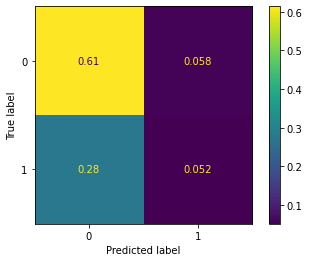

In [ ]:
%%time
cm_knn = confusion_matrix(y_teste, y_pred_knn, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp.plot(values_format='.2g') 

CPU times: user 45.6 ms, sys: 1.02 ms, total: 46.6 ms
Wall time: 48.5 ms


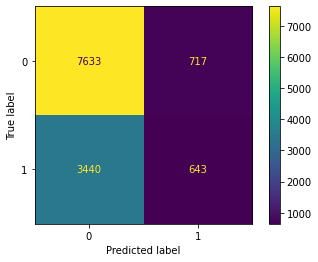

In [ ]:
%%time
cm_knn = confusion_matrix(y_teste, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp.plot(values_format='d') 

### 5.4.6 Avaliação

* A acurácia de 0.65 indica que o modelo acerta 65% das predições.
* A precisão de 0.44 indica que quando o modelo afirma que um caso virá a óbito, ele acerta 44% das vezes. A revocação de 0.14 indica que o modelo detecta 14% dos óbitos.
* Este modelo não seria um bom classificador para este estudo, porque tem precisão e revocação muito baixos.

## 5.5 Naive Bayes

### 5.5.1 Importando a função

In [ ]:
from sklearn.naive_bayes import GaussianNB

### 5.5.2 Treinando o modelo

In [ ]:
%%time
nb = GaussianNB()
nb.fit(X_treino, y_treino)

CPU times: user 17.8 ms, sys: 0 ns, total: 17.8 ms
Wall time: 16.4 ms


### 5.5.3 Predição

In [ ]:
%%time
y_pred_nb = nb.predict(X_teste)

CPU times: user 7.81 ms, sys: 46 µs, total: 7.86 ms
Wall time: 8.55 ms


### 5.5.4 Métricas

In [ ]:
print(f'Acurácia: {accuracy_score(y_teste, y_pred_nb)}\n\Precisão: {precision_score(y_teste, y_pred_nb)}\n\
      Recall: {recall_score(y_teste, y_pred_nb)} \nF1 Score: {f1_score(y_teste,  y_pred_nb, pos_label = 0)}')

Acurácia: 0.6584895037400467
\Precisão: 0.46812671098944075
      Recall: 0.2931667891256429 
F1 Score: 0.7670361022714803


### 5.5.5 Matriz de confusão

CPU times: user 47.8 ms, sys: 1.98 ms, total: 49.8 ms
Wall time: 49.8 ms


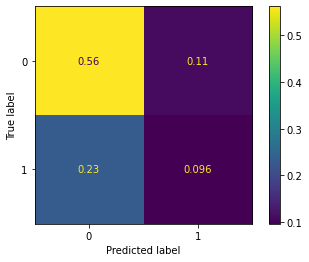

In [ ]:
%%time
cm_nb = confusion_matrix(y_teste, y_pred_nb, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb.classes_)
disp.plot(values_format='.2g') 

CPU times: user 55.4 ms, sys: 3.03 ms, total: 58.4 ms
Wall time: 58.1 ms


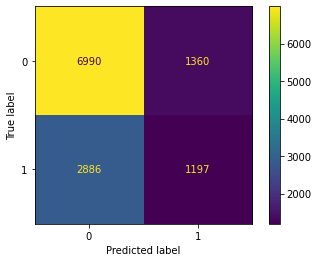

In [ ]:
%%time
cm_nb = confusion_matrix(y_teste, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb.classes_)
disp.plot(values_format='d') 

## 5.6 Random Forest Classifier

### 5.6.1 Importando

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### 5.6.2 Treinando o modelo

In [ ]:
%%time
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_treino, y_treino)

CPU times: user 1.58 s, sys: 4.97 ms, total: 1.58 s
Wall time: 1.59 s


### 5.6.3 Predição

In [ ]:
%%time
y_pred_rfc = rfc.predict(X_teste)

CPU times: user 316 ms, sys: 1.96 ms, total: 318 ms
Wall time: 324 ms


### 5.6.4 Métricas

In [ ]:
print(f'Acurácia: {accuracy_score(y_teste, y_pred_rfc)}\n\Precisão: {precision_score(y_teste, y_pred_rfc)}\n\
      Recall: {recall_score(y_teste, y_pred_rfc)} \nF1 Score: {f1_score(y_teste,  y_pred_rfc, pos_label = 0)}')

Acurácia: 0.6687042548057589
\Precisão: 0.4921052631578947
      Recall: 0.2747979426891991 
F1 Score: 0.777387450683673


## 5.7 Testando o aprendizado ensemble

### 5.7.1 Importando

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
svm2 = SVC(probability=True)

In [ ]:
voting = VotingClassifier(
    estimators = [('logreg', logreg), ('ardec', ardec), ('svm', svm2), ('nb', nb)],
    voting='soft'
)

### 5.7.2 Treinando

In [ ]:
%%time
voting.fit(X_treino, y_treino)

CPU times: user 3min 56s, sys: 661 ms, total: 3min 57s
Wall time: 3min 56s


VotingClassifier(estimators=[('logreg', LogisticRegression()),
                             ('ardec', DecisionTreeClassifier(max_depth=2)),
                             ('svm', SVC(probability=True)),
                             ('nb', GaussianNB())],
                 voting='soft')

### 5.7.3 Predição

In [ ]:
%%time
y_pred_en = voting.predict(X_teste)

CPU times: user 14.5 s, sys: 120 ms, total: 14.7 s
Wall time: 14.5 s


### 5.7.4 Métricas

In [ ]:
print(f'Acurácia: {accuracy_score(y_teste, y_pred_en)}\n\Precisão: {precision_score(y_teste, y_pred_en)}\n\
      Recall: {recall_score(y_teste, y_pred_en)} \nF1 Score: {f1_score(y_teste,  y_pred_en, pos_label = 0)}')

Acurácia: 0.6789190058714711
\Precisão: 0.5251798561151079
      Recall: 0.23242713690913544 
F1 Score: 0.789629005059022


### 5.7.5 Matriz de confusão

CPU times: user 65.3 ms, sys: 3.14 ms, total: 68.4 ms
Wall time: 64.8 ms


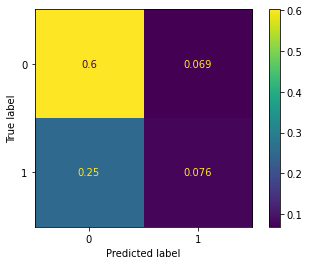

In [ ]:
%%time
cm_en = confusion_matrix(y_teste, y_pred_en, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_en, display_labels=voting.classes_)
disp.plot(values_format='.2g') 

CPU times: user 61.1 ms, sys: 4.14 ms, total: 65.3 ms
Wall time: 64.7 ms


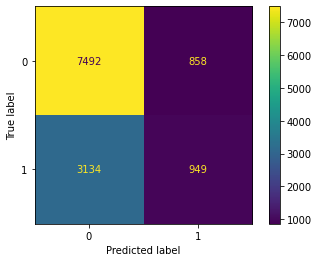

In [ ]:
%%time
cm_en = confusion_matrix(y_teste, y_pred_en)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_en, display_labels=voting.classes_)
disp.plot(values_format='d') 

## 5.8 XGBoost

[Tutorial](https://dadosaocubo.com/o-guia-do-xgboost-com-python/).

### 5.8.1 Importando

In [ ]:
#!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
%%time
xgb = XGBClassifier(n_estimators = 1000,
                    max_depth = 10, 
                    learning_rate = 0.01,
                    subsample = 1,
                    random_state=42,
                    eval_metric="auc")

CPU times: user 0 ns, sys: 56 µs, total: 56 µs
Wall time: 60.6 µs


### 5.8.2 Treinando o modelo

In [ ]:
%%time
xgb.fit(X_treino, y_treino)

CPU times: user 44.4 s, sys: 136 ms, total: 44.6 s
Wall time: 44.8 s


XGBClassifier(eval_metric='auc', learning_rate=0.01, max_depth=10,
              n_estimators=1000, random_state=42)

### 5.6.3 Predição

In [ ]:
%%time
y_pred_xgb = xgb.predict(X_teste)

CPU times: user 2.68 s, sys: 3.29 ms, total: 2.69 s
Wall time: 2.69 s


### 5.8.4 Métricas

In [ ]:
print(f'Acurácia: {accuracy_score(y_teste, y_pred_xgb)}\n\Precisão: {precision_score(y_teste, y_pred_xgb)}\n\
      Recall: {recall_score(y_teste, y_pred_xgb)} \nF1 Score: {f1_score(y_teste,  y_pred_xgb, pos_label = 0)}')

Acurácia: 0.679160299203732
\Precisão: 0.5259381898454746
      Recall: 0.2334068087190791 
F1 Score: 0.7897316957461387


### 5.8.5 Matriz de confusão

CPU times: user 58.6 ms, sys: 2.1 ms, total: 60.7 ms
Wall time: 59.1 ms


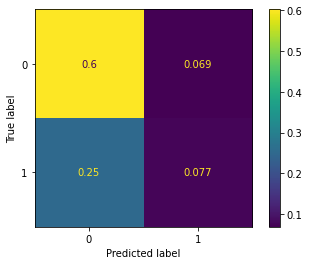

In [ ]:
%%time
cm_xgb = confusion_matrix(y_teste, y_pred_xgb, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb.classes_)
disp.plot(values_format='.2g') 

CPU times: user 55 ms, sys: 4.1 ms, total: 59.1 ms
Wall time: 60.2 ms


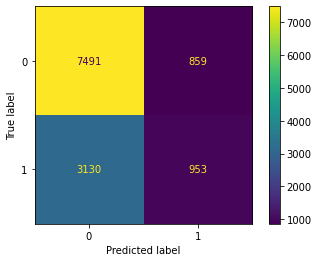

In [ ]:
%%time
cm_xgb = confusion_matrix(y_teste, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb.classes_)
disp.plot(values_format='d') 

## 5.9 Curvas ROC

In [ ]:
from sklearn import metrics

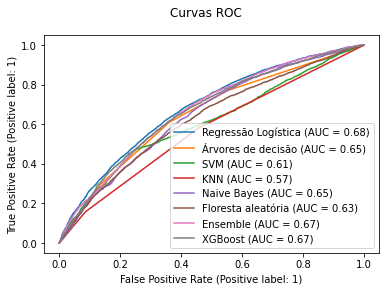

CPU times: user 33.5 s, sys: 326 ms, total: 33.9 s
Wall time: 33.4 s


In [ ]:
%%time
curvas_roc = metrics.plot_roc_curve(logreg, X_teste, y_teste, 
                                              name='Regressão Logística')
curvas_roc = metrics.plot_roc_curve(ardec, X_teste, y_teste,
                                              name='Árvores de decisão', 
                                              ax=curvas_roc.ax_)
curvas_roc = metrics.plot_roc_curve(svm, X_teste, y_teste,
                                              name='SVM', 
                                              ax=curvas_roc.ax_)
curvas_roc = metrics.plot_roc_curve(knn, X_teste, y_teste,
                                              name='KNN', 
                                              ax=curvas_roc.ax_)
curvas_roc = metrics.plot_roc_curve(nb, X_teste, y_teste,
                                              name='Naive Bayes', 
                                              ax=curvas_roc.ax_)
curvas_roc = metrics.plot_roc_curve(rfc, X_teste, y_teste,
                                              name='Floresta aleatória', 
                                              ax=curvas_roc.ax_)
curvas_roc = metrics.plot_roc_curve(voting, X_teste, y_teste,
                                              name='Ensemble', 
                                              ax=curvas_roc.ax_)
curvas_roc = metrics.plot_roc_curve(xgb, X_teste, y_teste,
                                              name='XGBoost', 
                                              ax=curvas_roc.ax_)
curvas_roc.figure_.suptitle("Curvas ROC")

plt.show()

## 5.9 Comparação dos modelos de classificação

### 5.9.1 Sem balanceamento, sem idade normalizada e sem feature de quantidade de doenças

| Modelo | Acurácia| Precisão| Revocação|F1 Score|
|--------|---------|---------|----------|--------|
|Regressão logística| 0.68 | 0.70|0.92|0.80|
|Árvores de Decisão|0.68|0.71|0.86|0.78|
|Máquina de vetores de suporte|0.67|0.68|*0.99**|0.80|
|Classificador KNN| 0.65| 0.44| 0.14| 0.78|
|Naive Bayes| 0.66| 0.46| 0.29| 0.76|
|Florestas Aleatórias| 0.67| 0.49| 0.28| 0.78|
|Ensemble| 0.68| 0.54| 0.21 | 0.79|
|XGBoost| 0.68|0.52|0.23| 0.79|

*Diminui muito o VP.

### 5.9.2 Depois do balanceamento com oversampling

| Modelo | Acurácia| Precisão| Revocação|F1 Score|
|--------|---------|---------|----------|--------|
|Regressão logística| 0.63 | 0.63|0.60|0.62|
|Árvores de Decisão|0.61|0.62|0.61|0.61|
|Máquina de vetores de suporte|0.62|0.62|0.60|0.61|
|Classificador KNN| 0.56| 0.62| 0.34| 0.64|
|Naive Bayes| 0.61| 0.60| 0.67| 0.59|
|Florestas Aleatórias| 0.67| 0.49| 0.28| 0.78|
|Ensemble| 0.62| 0.61| 0.65 | 0.61|
|XGBoost| 0.63|0.62|0.64| 0.62|

### 5.9.3 Sem balanceamento com oversampling, com idade normalizada e feature de quantidade de doenças.

| Modelo | Acurácia| Precisão| Revocação|F1 Score|
|--------|---------|---------|----------|--------|
|Regressão logística| 0.69 | 0.57|0.21|0.80|
|Árvores de Decisão|0.68|0.71|0.86|0.78|
|Máquina de vetores de suporte|0.68|0.69|0.95|0.79|
|Classificador KNN| 0.66| 0.47| 0.16| 0.78|
|Naive Bayes| 0.66| 0.47| 0.16| 0.78|
|Florestas Aleatórias| 0.67| 0.49| 0.27| 0.78|
|Ensemble| 0.68| 0.52| 0.23 | 0.79|
|XGBoost| 0.68|0.52|0.23| 0.79|

### 5.9.4 Diminuindo o número de features

Limitando as features e doenças para as principais doenças consideradas pelo artigo "[Comorbidades: confira quais são as principais doenças que podem agravar quadros de Covid-19](https://saudedasaude.anahp.com.br/comorbidades-confira-quais-sao-as-principais-doencas-que-podem-agravar-quadros-de-covid-19/)" do site [Saúde da Saúde](https://saudedasaude.anahp.com.br/) da [Anahp - Associação Nacional de Hospitais Privados](https://www.anahp.com.br/).

São elas:

* Obesidade
* Diabetes
* Cardiopatias
* Renais
* Pulmonares
* Sistema nervoso
* Asma

| Modelo | Acurácia| Precisão| Revocação|F1 Score|
|--------|---------|---------|----------|--------|
|Regressão logística| 0.69 | 0.57|0.21|0.80|
|Árvores de Decisão|0.68|0.71|0.86|0.78|
|Máquina de vetores de suporte|0.68|0.69|0.95|0.79|
|Classificador KNN| 0.66| 0.47| 0.16| 0.78|
|Naive Bayes| 0.66| 0.49| 0.26| 0.78|
|Florestas Aleatórias| 0.67| 0.49| 0.27| 0.78|
|Ensemble| 0.68| 0.54| 0.21 | 0.79|
|XGBoost| 0.68|0.53|0.23| 0.79|

## 5.10 Feature importance no modelo de regressão logística - Não precisa citar no artigo

Sem o balanceamento, era o modelo com melhor resultado.

Material utilizado, [aqui](https://sefiks.com/2021/01/06/feature-importance-in-logistic-regression/).

In [ ]:
import math

Armazenando o intercepto e os coeficientes:

In [ ]:
w0 = logreg.intercept_[0]
w = w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13= logreg.coef_[0]

Visualizando a importância das features.

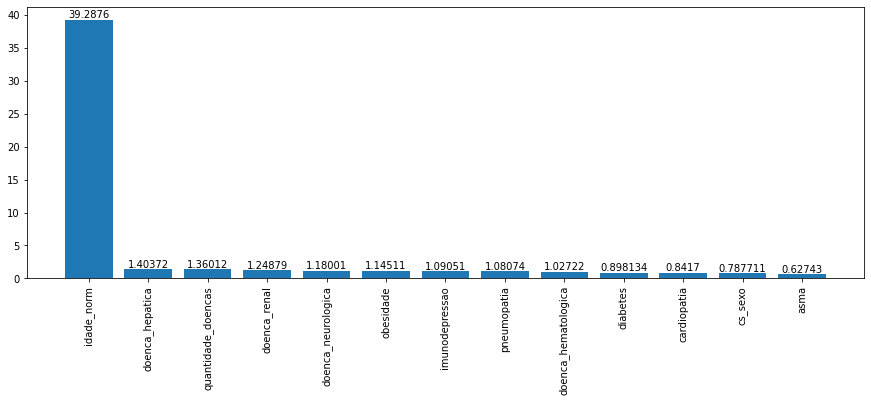

CPU times: user 427 ms, sys: 53.6 ms, total: 480 ms
Wall time: 899 ms


In [ ]:
%%time
feature_names = ['idade_norm', 'cs_sexo', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade', 'pneumopatia', 'quantidade_doencas']
feature_importance = pd.DataFrame(feature_names, columns = ["Feature"])
feature_importance["Importância"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["Importância"], ascending=False)

#ax = feature_importance.plot.barh(x='Feature', y='Importância')
fig, ax = plt.subplots(figsize=(15, 5))
bars = ax.bar(feature_importance['Feature'], feature_importance['Importância'])
ax.bar_label(bars)
ax.tick_params(axis='x', rotation=90)
plt.show()

## 5.11 Grid search com regressão logística

### 5.11.1 Aplicando na regressão logística

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
%%time
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} 

#penalty: norma de penalização. https://builtin.com/data-science/l2-regularization
#C: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
 
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_treino,y_treino)

CPU times: user 10.6 s, sys: 6.76 s, total: 17.3 s
Wall time: 10.6 s


In [ ]:
print("Melhores hiperparãmetros:",logreg_cv.best_params_)
print("Acurácia :",logreg_cv.best_score_)

Melhores hiperparãmetros: {'C': 100.0, 'penalty': 'l2'}
Acurácia : 0.6867399067957509


### 5.11.2 Treinando o modelo com os melhores hiperparâmetros do GS

In [ ]:
logreg2 = LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_treino,y_treino)

LogisticRegression(C=1)

In [ ]:
%%time
y_pred_gs = logreg2.predict(X_teste)

CPU times: user 4.92 ms, sys: 41 µs, total: 4.96 ms
Wall time: 4.52 ms


### 5.11.3 Métricas

In [ ]:
print(f'Acurácia: {accuracy_score(y_teste, y_pred_gs)}\n\Precisão: {precision_score(y_teste, y_pred_gs)}\n\
      Recall: {recall_score(y_teste, y_pred_gs)} \nF1 Score: {f1_score(y_teste,  y_pred_gs, pos_label = 0)}')

Acurácia: 0.6898576369339661
\Precisão: 0.5740378343118069
      Recall: 0.21552779818760714 
F1 Score: 0.7996883116883118


### 5.11.4 Matriz de confusão

CPU times: user 67.7 ms, sys: 50.3 ms, total: 118 ms
Wall time: 74.1 ms


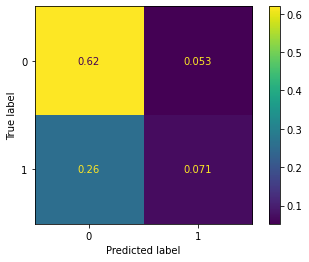

In [ ]:
%%time
cm_gs = confusion_matrix(y_teste, y_pred_gs, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gs, display_labels=logreg2.classes_)
disp.plot(values_format='.2g') 

CPU times: user 57 ms, sys: 4.15 ms, total: 61.2 ms
Wall time: 59.5 ms


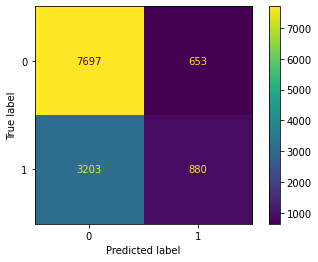

In [ ]:
%%time
cm_gs = confusion_matrix(y_teste, y_pred_gs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gs, display_labels=logreg2.classes_)
disp.plot(values_format='d')  

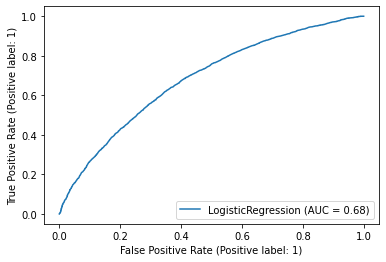

CPU times: user 211 ms, sys: 155 ms, total: 366 ms
Wall time: 216 ms


In [ ]:
%%time
metrics.plot_roc_curve(logreg2, X_teste, y_teste)
plt.show()

## 5.12 Random Search com regressão logística

### 5.12.1 Aplicando na regressão logística

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
%%time
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} 

#penalty: norma de penalização. https://builtin.com/data-science/l2-regularization
#C: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
 
logreg_rs=RandomizedSearchCV(estimator = logreg,\
                         param_distributions = grid,\
                         scoring = 'precision', cv=10, n_iter = 1000)
logreg_rs.fit(X_treino,y_treino)

CPU times: user 11.1 s, sys: 7.91 s, total: 19 s
Wall time: 15.1 s


In [ ]:
print("Melhores hiperparãmetros:",logreg_rs.best_params_)
print("Acurácia :",logreg_rs.best_score_)

Melhores hiperparãmetros: {'penalty': 'l2', 'C': 0.01}
Acurácia : 0.6038988743444833


### 5.12.2 Treinando o modelo com os melhores hiperparâmetros do GS

In [ ]:
logreg3 = LogisticRegression(C=0.01,penalty="l2")
logreg3.fit(X_treino,y_treino)

LogisticRegression(C=0.01)

In [ ]:
%%time
y_pred_rs = logreg3.predict(X_teste)

CPU times: user 7.76 ms, sys: 4.07 ms, total: 11.8 ms
Wall time: 18.5 ms


### 5.12.3 Métricas

In [ ]:
print(f'Acurácia: {accuracy_score(y_teste, y_pred_rs)}\n\Precisão: {precision_score(y_teste, y_pred_rs)}\n\
      Recall: {recall_score(y_teste, y_pred_rs)} \nF1 Score: {f1_score(y_teste,  y_pred_rs, pos_label = 0)}')

Acurácia: 0.6844687525134722
\Precisão: 0.6058201058201058
      Recall: 0.11217242223855009 
F1 Score: 0.8041144454985768


### 5.12.4 Matriz de confusão

CPU times: user 93.1 ms, sys: 4.23 ms, total: 97.3 ms
Wall time: 249 ms


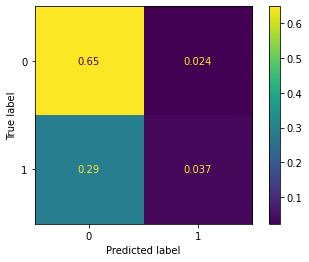

In [ ]:
%%time
cm_rs = confusion_matrix(y_teste, y_pred_rs, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rs, display_labels=logreg3.classes_)
disp.plot(values_format='.2g') 

CPU times: user 77.1 ms, sys: 5.13 ms, total: 82.2 ms
Wall time: 141 ms


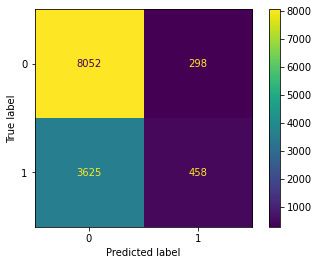

In [ ]:
%%time
cm_rs = confusion_matrix(y_teste, y_pred_rs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rs, display_labels=logreg3.classes_)
disp.plot(values_format='d')  

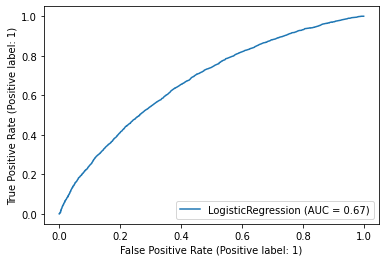

CPU times: user 268 ms, sys: 45.1 ms, total: 313 ms
Wall time: 363 ms


In [ ]:
%%time
metrics.plot_roc_curve(logreg3, X_teste, y_teste)
plt.show()